# ControlNet for CameraPose Conditioning

!!DISCLAIMER!!

You can ran the import and the skip all the subsection with the SKIP tag

In [1]:
%pip install wandb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install triton

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement triton (from versions: none)
ERROR: No matching distribution found for triton

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install torch==2.4.0 torchaudio torchvision --index-url https://download.pytorch.org/whl/cu118 xformers triton

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.4.0%2Bcu118-cp311-cp311-win_amd64.whl (2692.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement triton (from versions: none)
ERROR: No matching distribution found for triton

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install git+https://github.com/huggingface/diffusers.git accelerate transformers bitsandbytes

  Cloning https://github.com/huggingface/diffusers.git to c:\users\varlab\appdata\local\temp\pip-req-build-tho_rnjr
  Resolved https://github.com/huggingface/diffusers.git to commit 8fcfb2a456e5c35d6d532faccf4859d303c22501
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git 'C:\Users\VarLab\AppData\Local\Temp\pip-req-build-tho_rnjr'

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip list

Package                   Version
------------------------- --------------
accelerate                0.32.1
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bitsandbytes              0.43.1
bleach                    6.1.0
certifi                   2024.7.4
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
defusedxml                0.7.1
diffusers                 0.31.0.dev0
docker-pycreds            0.4.0
executing                 2.0.1
fastjsonschema            2.20.0
filelock                  3.13.1
fonttools

In [6]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import glob
import os
import numpy as np
import re
from tqdm.notebook import tqdm
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from huggingface_hub import hf_hub_download, hf_hub_url
import json
import gzip

from torchvision.io import read_image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split

from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

import bitsandbytes as bnb
from PIL import Image

import wandb
#wandb.login()

A matching Triton is not available, some optimizations will not be enabled
Traceback (most recent call last):
  File "d:\Jacopo Meglioraldi\Camtrolnet\camtrolnet\Lib\site-packages\xformers\__init__.py", line 57, in _is_triton_available
    import triton  # noqa
    ^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'triton'


In [ ]:
#SKIP
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = "./content/000-000"
data_path = "./content/000-000"
drive_path = "./content/drive/MyDrive/ML4CV_poject/data/000-000"

## Download from source[SKIP]

Download the dataset already rendered from BAAI/Objaverse-Mix

In [ ]:
!pip install huggingface_hub

In [ ]:
file_path = "/content/000-000"
drive_path = "/content/drive/MyDrive/ML4CV_poject/data/000-000"

In [ ]:
hf_hub_download(repo_id="BAAI/Objaverse-MIX", filename="rendered_images/000-000.7z", repo_type="dataset", local_dir=file_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


000-000.7z:   0%|          | 0.00/4.67G [00:00<?, ?B/s]

'/content/000-000/rendered_images/000-000.7z'

In [ ]:
!apt-get install p7zip-full
!p7zip -d "/content/000-000/rendered_images/000-000.7z" "/content/000-000"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,12 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (50657),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/000-000/rendered_images/                                           1 file, 4669367606 bytes (4454 MiB)

Extracting archive: /content/000-000/rendered_images/000-000.7z
--
Path = /content/000-000/rendered_images/000-000.7z
Type = 7z
Physical Size = 4669367606
Headers Size = 775142
Method = LZMA2:26
Solid = +
Blocks = 3

  0%      0% 4955 - 000-000/fcd9e2402699453eb148835ee84b8189

In [ ]:
#check that the folder with the zip has been deleted
os.path.isdir("/content/000-000/rendered_images")

True

In [ ]:
os.rmdir("/content/000-000/rendered_images")

In [ ]:
#check number of items
len(os.listdir("/content/000-000"))

5001

## Copy data to drive [SKIP]

In [ ]:
#copy to drive
!cp -r "/content/000-000" "/content/drive/MyDrive/ML4CV_poject/data/000-000"

## Create DataFrame [SKIP]

All the data from folder 000-000 have been downloaded and stored on the drive folder.
Now we can import them and create a dataframe, or load directly another one

In [ ]:
#get all the path to all images and camera data [ONLY IF DATAFRAME HAVE NOT BEEN CREATED]
data_path = "/content/000-000"
drive_path = "/content/drive/MyDrive/ML4CV_poject/data/000-000"
data = [["model_id", "image_id", "image_path", "camera_path"]]
for img_path in glob.glob(os.path.join(data_path, "**/*.png"), recursive = True):
  model_id = img_path.split("/")[-2]
  img_id = re.split("[/.]",img_path)[-2]
  param_path = img_path[:-4]+".npy"
  #camera_params = np.load(param_path).flatten()
  data.append([model_id,
                img_id,
                img_path,
                param_path])
print(data[:20])

[['model_id', 'image_id', 'image_path', 'camera_path'], ['630fe4d774bc44bb94cc43ebbe05c796', '019', '/content/000-000/630fe4d774bc44bb94cc43ebbe05c796/019.png', '/content/000-000/630fe4d774bc44bb94cc43ebbe05c796/019.npy'], ['630fe4d774bc44bb94cc43ebbe05c796', '015', '/content/000-000/630fe4d774bc44bb94cc43ebbe05c796/015.png', '/content/000-000/630fe4d774bc44bb94cc43ebbe05c796/015.npy'], ['630fe4d774bc44bb94cc43ebbe05c796', '016', '/content/000-000/630fe4d774bc44bb94cc43ebbe05c796/016.png', '/content/000-000/630fe4d774bc44bb94cc43ebbe05c796/016.npy'], ['630fe4d774bc44bb94cc43ebbe05c796', '020', '/content/000-000/630fe4d774bc44bb94cc43ebbe05c796/020.png', '/content/000-000/630fe4d774bc44bb94cc43ebbe05c796/020.npy'], ['630fe4d774bc44bb94cc43ebbe05c796', '018', '/content/000-000/630fe4d774bc44bb94cc43ebbe05c796/018.png', '/content/000-000/630fe4d774bc44bb94cc43ebbe05c796/018.npy'], ['630fe4d774bc44bb94cc43ebbe05c796', '014', '/content/000-000/630fe4d774bc44bb94cc43ebbe05c796/014.png', '/co

In [ ]:
#build dataframe
df = pd.DataFrame(np.array(data[1:]), columns = data[0])

In [ ]:
df.head()

model_id image_id  \
0  630fe4d774bc44bb94cc43ebbe05c796      019   
1  630fe4d774bc44bb94cc43ebbe05c796      015   
2  630fe4d774bc44bb94cc43ebbe05c796      016   
3  630fe4d774bc44bb94cc43ebbe05c796      020   
4  630fe4d774bc44bb94cc43ebbe05c796      018   

                                          image_path  \
0  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
1  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
2  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
3  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
4  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   

                                         camera_path  
0  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  
1  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  
2  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  
3  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  
4  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...

In [ ]:
#load camera params
matrices = np.zeros((df.shape[0],12))
for i,filename in enumerate(tqdm(df['camera_path'])):
  matrices[i,:] = np.load(filename).flatten()

print(matrices.shape)

  0%|          | 0/60000 [00:00<?, ?it/s]

(60000, 12)


In [ ]:
#concat to the other dataframe
camera_df = pd.DataFrame(matrices)
dfs = pd.concat([df,camera_df], axis=1)

In [ ]:
dfs.iloc[:5]

model_id image_id  \
0  630fe4d774bc44bb94cc43ebbe05c796      019   
1  630fe4d774bc44bb94cc43ebbe05c796      015   
2  630fe4d774bc44bb94cc43ebbe05c796      016   
3  630fe4d774bc44bb94cc43ebbe05c796      020   
4  630fe4d774bc44bb94cc43ebbe05c796      018   

                                          image_path  \
0  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
1  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
2  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
3  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
4  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   

                                         camera_path             0         1  \
0  /content/000-000/630fe4d774bc44bb94cc43ebbe05c... -5.000001e-01  0.866026   
1  /content/000-000/630fe4d774bc44bb94cc43ebbe05c... -2.220446e-16  1.000000   
2  /content/000-000/630fe4d774bc44bb94cc43ebbe05c... -1.000000e+00  0.000000   
3  /content/000-000/630fe4d774bc44bb94cc43ebbe05c... -5.000001e-01 -0.866026   
4  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  1.000000e+00  0.000000   

              2             3    4             5         6             7  \
0 -2.660509e-08  3.762528e-08 -0.5 -2.886752e-01  0.816497  2.682209e-07   
1  0.000000e+00  4.440892e-16  0.0 -2.220446e-16  1.000000  0.000000e+00   
2  0.000000e+00  0.000000e+00  0.0 -1.343589e-07  1.000000  2.687177e-07   
3  2.660509e-08 -3.762528e-08  0.5 -2.886752e-01  0.816497  2.682209e-07   
4  0.000000e+00  0.000000e+00  0.0  7.071068e-01  0.707107 -5.960464e-08   

          8         9            10       11  
0  0.707107  0.408248  5.773503e-01 -2.44949  
1  1.000000  0.000000 -2.220446e-16 -2.00000  
2  0.000000  1.000000 -1.343589e-07 -2.00000  
3 -0.707107  0.408248  5.773503e-01 -2.44949  
4  0.000000 -0.707107  7.071068e-01 -2.00000

In [ ]:
#save dfs
dfs.to_csv(data_path+".csv", index = False)

In [ ]:
#save also in drive
!cp "/content/000-000.csv" "/content/drive/MyDrive/ML4CV_poject/data"

## Cartesian to spherical [SKIP]

In [ ]:
df = pd.read_csv(drive_path+".csv", dtype = {'image_id': str})
print(df.shape)
df.head()

(60000, 16)


model_id image_id  \
0  630fe4d774bc44bb94cc43ebbe05c796      019   
1  630fe4d774bc44bb94cc43ebbe05c796      015   
2  630fe4d774bc44bb94cc43ebbe05c796      016   
3  630fe4d774bc44bb94cc43ebbe05c796      020   
4  630fe4d774bc44bb94cc43ebbe05c796      018   

                                          image_path  \
0  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
1  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
2  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
3  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
4  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   

                                         camera_path             0         1  \
0  /content/000-000/630fe4d774bc44bb94cc43ebbe05c... -5.000001e-01  0.866026   
1  /content/000-000/630fe4d774bc44bb94cc43ebbe05c... -2.220446e-16  1.000000   
2  /content/000-000/630fe4d774bc44bb94cc43ebbe05c... -1.000000e+00  0.000000   
3  /content/000-000/630fe4d774bc44bb94cc43ebbe05c... -5.000001e-01 -0.866026   
4  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  1.000000e+00  0.000000   

              2             3    4             5         6             7  \
0 -2.660509e-08  3.762528e-08 -0.5 -2.886752e-01  0.816497  2.682209e-07   
1  0.000000e+00  4.440892e-16  0.0 -2.220446e-16  1.000000  0.000000e+00   
2  0.000000e+00  0.000000e+00  0.0 -1.343589e-07  1.000000  2.687177e-07   
3  2.660509e-08 -3.762528e-08  0.5 -2.886752e-01  0.816497  2.682209e-07   
4  0.000000e+00  0.000000e+00  0.0  7.071068e-01  0.707107 -5.960464e-08   

          8         9            10       11  
0  0.707107  0.408248  5.773503e-01 -2.44949  
1  1.000000  0.000000 -2.220446e-16 -2.00000  
2  0.000000  1.000000 -1.343589e-07 -2.00000  
3 -0.707107  0.408248  5.773503e-01 -2.44949  
4  0.000000 -0.707107  7.071068e-01 -2.00000

In [ ]:
df.dtypes

model_id        object
image_id        object
image_path      object
camera_path     object
0              float64
1              float64
2              float64
3              float64
4              float64
5              float64
6              float64
7              float64
8              float64
9              float64
10             float64
11             float64
dtype: object

In [ ]:
#print reference camera frame!
def plot_frame(R,T, ax, j=0, **kwargs):
  I = np.eye(3,3)
  zero = np.zeros(3)
  colors = ["red", "green", "blue"]
  new_T = -np.matmul(R.T,T[:,None])
  R = R.T
  new_frame = np.matmul(R,I)+new_T
  #print("new_frame", new_frame)
  for i in range(3):
    endpoints = new_frame[:,i]
    xs, ys, zs = zip(zero+new_T[:,0], endpoints)
    #print("endpoints", xs, ys, zs)
    ax.plot(xs, ys, zs, colors[i], **kwargs)
  ax.text(new_T[0,0],new_T[1,0],new_T[2,0] ,str(j))
  return ax

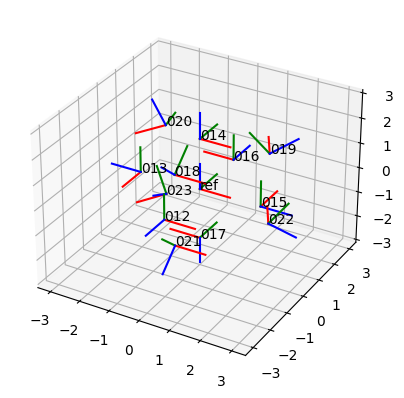

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
plot_frame(np.eye(3,3).T, np.zeros(3), ax, "ref")
for j in range(12):
  if not (df[['image_id']].iloc[j].values in ['%03d' % i for i in range(10,30)]):
    continue
  camera = df[[str(i) for i in range(12)]].iloc[j].to_numpy().reshape(3,4)
  #print(camera)
  R = camera[:,:3]
  T = camera[:,3]
  #print("is ortonormal?", np.allclose(R.dot(R.T), np.eye(3,3)), np.isclose(np.linalg.norm(R),1), np.linalg.norm(R))
  plot_frame(R,T,ax,df['image_id'].iloc[j])
plt.show()

We move to cartesian coordinate system, because 2 of the three coordinates are bounded (easier to learn for the model). We also then use "camera look to" reference system with OpenGL convention as a standard way of retrive the rotation matrix. For this, we need an additional theta angle in order to account possible z-rotation of the camera (e.g. looking to the object upside down)

In [ ]:
def cartesian2spherical(T):
  if len(T.size())<=1:
    T = T[None,:]
  spherical = torch.zeros(T.size())
  xy = T[:,0]**2 + T[:,1]**2
  spherical[:,0] = np.sqrt(xy + T[:,2]**2)
  spherical[:,1] = np.arctan2(np.sqrt(xy), T[:,2]) # for elevation angle defined from Z-axis down
  spherical[:,2] = np.arctan2(T[:,1], T[:,0])
  return spherical

def spherical2cartesian(sph):
  if len(sph.size())<=1:
    sph = sph[None,:]
  xyz = torch.zeros(sph.size())
  xyz[:,0] = sph[:,0] * torch.sin(sph[:,1]) * torch.cos(sph[:,2])
  xyz[:,1] = sph[:,0] * torch.sin(sph[:,1]) * torch.sin(sph[:,2])
  xyz[:,2] = sph[:,0] * torch.cos(sph[:,1])
  return xyz

def get_look_matrix(T, target = torch.zeros((3))):
  if len(T.size())<=1:
    T = T[None,:]
  z = torch.nn.functional.normalize(T-target, dim = -1)
  up_y = torch.zeros(T.size())
  up_y[torch.isclose(z[:,2].abs(), torch.ones(z.size()[0])), 1] = 1 # (0, 1, 0)
  up_y[~torch.isclose(z[:,2].abs(), torch.ones(z.size()[0])), 2] = 1 # (0, 0, 1)

  x = torch.nn.functional.normalize(torch.cross(up_y, z, dim = -1), dim = -1)
  y = torch.nn.functional.normalize(torch.cross(z, x, dim = -1), dim = -1)
  R = torch.stack([x,y,z], dim = 1)
  return R, T

def get_z_rot(R1,R2):
  if len(R1.size())<=2:
    R1 = R1[None,:,:]
  if len(R2.size())<=2:
    R2 = R2[None,:,:]
  assert torch.allclose(R1[:,2,:],R2[:,2,:], atol=1e-05), "Z axis are not the same!"+str((~torch.isclose(R1[:,2,:],R2[:,2,:], atol=1e-05)).nonzero()) #check that z axis are the same
  x1 = R1[:,0,:]
  x2 = R2[:,0,:]
  theta = torch.acos(torch.clamp(torch.sum(x1*x2,dim = 1) / (x1.norm(dim = 1)*x2.norm(dim = 1)), min=-1, max=1))
  #print(theta.size())
  return theta[:,None]

In [ ]:
#Test get spherical look origin cameras
for j in range(12):
  camera = df[[str(i) for i in range(12)]].iloc[j].to_numpy().reshape(3,4)
  #print(camera)
  R = torch.Tensor(camera[:,:3])
  T = torch.Tensor(camera[:,3])
  inv_T = torch.matmul(torch.transpose(R,0,1),-T)
  spherical = cartesian2spherical(inv_T)
  RL, TL = get_look_matrix(inv_T)
  theta = get_z_rot(R,RL)
  new_ref = torch.hstack([spherical, theta])
  print("new_ref!", new_ref)

new_ref! tensor([[2.4495, 0.9553, 0.5236, 0.0000]])
new_ref! tensor([[ 2.0000e+00,  1.5708e+00, -2.2204e-16,  0.0000e+00]])
new_ref! tensor([[2.0000, 1.5708, 1.5708, 0.0000]])
new_ref! tensor([[2.4495, 0.9553, 2.6180, 0.0000]])
new_ref! tensor([[ 2.0000,  0.7854, -1.5708,  0.0000]])
new_ref! tensor([[2., 0., 0., 0.]])
new_ref! tensor([[2.4495, 2.1863, 0.5236, 0.0000]])
new_ref! tensor([[2.4495, 2.1863, 2.6180, 0.0000]])
new_ref! tensor([[2.0000, 3.1416, 0.0000, 0.0000]])
new_ref! tensor([[ 2.0000,  2.3562, -1.5708,  0.0000]])
new_ref! tensor([[ 2.0000,  1.5708, -3.1416,  0.0000]])
new_ref! tensor([[ 2.0000,  1.5708, -1.5708,  0.0000]])


In [ ]:
def check_camera_diff(diff, sph1, sph2, R2):
  assert torch.allclose(sph2, sph1 + diff), "vector are not close"
  T = spherical2cartesian(sph1 + diff)
  _R2, _ = get_look_matrix(T)
  print(_R2,"\n",R2)
  assert torch.allclose(_R2,R2, atol=1e-05), "look matrices are not close"

In [ ]:
#check that evrything is ok
camera1 = df[[str(i) for i in range(12)]].iloc[1].to_numpy().reshape(3,4)
camera2 = df[[str(i) for i in range(12)]].iloc[2].to_numpy().reshape(3,4)
#print(camera)
R1 = torch.Tensor(camera1[:,:3])
T1 = torch.Tensor(camera1[:,3])
inv_T1 = torch.matmul(torch.transpose(R1,0,1),-T1)
spherical1 = cartesian2spherical(inv_T1)
RL1, TL1 = get_look_matrix(inv_T1)
theta1 = get_z_rot(R1,RL1)
new_ref1 = torch.hstack([spherical1, theta1])
print("new ref 1:", new_ref1)



R2 = torch.Tensor(camera2[:,:3])
T2 = torch.Tensor(camera2[:,3])
inv_T2 = torch.matmul(torch.transpose(R2,0,1),-T2)
spherical2 = cartesian2spherical(inv_T2)
RL2, TL2 = get_look_matrix(inv_T2)
theta2 = get_z_rot(R2,RL2)
new_ref2 = torch.hstack([spherical2, theta2])
print("new ref 2:", new_ref2)

#diff
diff = spherical2 - spherical1
#print("DIFF:", diff)
check_camera_diff(diff, spherical1, spherical2, R2)

new ref 1: tensor([[ 2.0000e+00,  1.5708e+00, -2.2204e-16,  0.0000e+00]])
new ref 2: tensor([[2.0000, 1.5708, 1.5708, 0.0000]])
tensor([[[-1.0000e+00, -4.3711e-08,  0.0000e+00],
         [-1.2332e-14,  2.8213e-07,  1.0000e+00],
         [-4.3711e-08,  1.0000e+00, -2.8213e-07]]]) 
 tensor([[-1.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -1.3436e-07,  1.0000e+00],
        [ 0.0000e+00,  1.0000e+00, -1.3436e-07]])


In [ ]:
#compute new reference system for the df
cameras = torch.Tensor(df[[str(i) for i in range(12)]].to_numpy()).reshape(-1,3,4)
R, T = cameras[:,:,:3], cameras[:,:,3]
print("sizes", R.size(), "\n",T.size())
inv_T = torch.matmul(torch.transpose(R,1,2),-T[:,:,None])[:,:,0]
sph = cartesian2spherical(inv_T)
R_hat, _ = get_look_matrix(inv_T)
theta = get_z_rot(R_hat, R)
print(sph.size(), theta.size())
new_ref = torch.hstack([sph, theta])
print(new_ref.size())

sizes torch.Size([60000, 3, 3]) 
 torch.Size([60000, 3])
torch.Size([60000, 3]) torch.Size([60000, 1])
torch.Size([60000, 4])


In [ ]:
# is there any nan or non_zero matrix on the theta roation on z look axis??
non_zero = (~torch.isclose(new_ref[:,3], torch.zeros(new_ref[:,3].size()), atol=1e-05)).nonzero()
print(non_zero, "\n size ", non_zero.size())

tensor([], size=(0, 1), dtype=torch.int64) 
 size  torch.Size([0, 1])


Because all the reference frame are "canonical" as look-center rotation reference frame, we can remove the last parameter of the spehrical reference frame.

In [ ]:
new_ref = new_ref[:,:3]

In [ ]:
new_ref[:10,:]

tensor([[ 2.4495e+00,  9.5532e-01,  5.2360e-01],
        [ 2.0000e+00,  1.5708e+00, -2.2204e-16],
        [ 2.0000e+00,  1.5708e+00,  1.5708e+00],
        [ 2.4495e+00,  9.5532e-01,  2.6180e+00],
        [ 2.0000e+00,  7.8540e-01, -1.5708e+00],
        [ 2.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 2.4495e+00,  2.1863e+00,  5.2360e-01],
        [ 2.4495e+00,  2.1863e+00,  2.6180e+00],
        [ 2.0000e+00,  3.1416e+00,  0.0000e+00],
        [ 2.0000e+00,  2.3562e+00, -1.5708e+00]])

In [ ]:
#update the df
new_df = df.drop([str(i) for i in range(12)],axis = 1)
spherical_df = pd.DataFrame(new_ref)
new_df = pd.concat([new_df,spherical_df], axis=1)
new_df.head()

model_id image_id  \
0  630fe4d774bc44bb94cc43ebbe05c796      019   
1  630fe4d774bc44bb94cc43ebbe05c796      015   
2  630fe4d774bc44bb94cc43ebbe05c796      016   
3  630fe4d774bc44bb94cc43ebbe05c796      020   
4  630fe4d774bc44bb94cc43ebbe05c796      018   

                                          image_path  \
0  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
1  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
2  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
3  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
4  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   

                                         camera_path        0         1  \
0  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  2.44949  0.955317   
1  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  2.00000  1.570796   
2  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  2.00000  1.570797   
3  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  2.44949  0.955317   
4  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  2.00000  0.785398   

              2  
0  5.235987e-01  
1 -2.220446e-16  
2  1.570796e+00  
3  2.617994e+00  
4 -1.570796e+00

In [ ]:
#Save spherical reference dataframe!
new_df.to_csv(drive_path+"_spherical.csv", index = False)

## Relative camera position [SKIP]
To make the model more robust, as suggested and used in papers, we would like to have relative camera position instead of absolute one

In [ ]:
df = pd.read_csv(drive_path+"_spherical.csv", dtype = {'image_id': str})
print(df.shape)
df.head()

(60000, 7)


model_id image_id  \
0  630fe4d774bc44bb94cc43ebbe05c796      019   
1  630fe4d774bc44bb94cc43ebbe05c796      015   
2  630fe4d774bc44bb94cc43ebbe05c796      016   
3  630fe4d774bc44bb94cc43ebbe05c796      020   
4  630fe4d774bc44bb94cc43ebbe05c796      018   

                                          image_path  \
0  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
1  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
2  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
3  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   
4  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...   

                                         camera_path         0         1  \
0  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  2.449490  0.955317   
1  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  2.000000  1.570796   
2  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  2.000001  1.570797   
3  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  2.449490  0.955317   
4  /content/000-000/630fe4d774bc44bb94cc43ebbe05c...  2.000000  0.785398   

              2  
0  5.235987e-01  
1 -2.220446e-16  
2  1.570796e+00  
3  2.617994e+00  
4 -1.570796e+00

In [ ]:
df.dtypes

model_id        object
image_id        object
image_path      object
camera_path     object
0              float64
1              float64
2              float64
dtype: object

We compute the difference by simply doing the difference of values. For angles we use the signed shortest difference.

In [ ]:
def compute_pair (d1, d2, keys_to_remove):
  sph1 = np.array([d1[str(i)] for i in range(3)])
  sph2 = np.array([d2[str(i)] for i in range(3)])
  def short_ang_dist(a):
    return (a + np.pi) % (2*np.pi) - (np.pi)

  rel_sph = sph2-sph1
  rel_sph[2] = short_ang_dist(rel_sph[2])
  new_row = {k:v for k,v in d1.items() if k not in keys_to_remove}
  new_row['image_id2'] = d2['image_id']
  new_row['image_path2'] = d2['image_path']
  new_row.update({str(i):x for i,x in enumerate(rel_sph)})
  return new_row

In [ ]:
from itertools import permutations
def create_pairs(subdf, keys_to_remove):
  return [compute_pair(d1,d2,keys_to_remove) for d1,d2 in permutations(subdf.to_dict('records'),2)]


In [ ]:
#Create new dataframe with the pairs
cols_to_remove = ['camera_path']
pairs = []
for _,subdf in tqdm(df.groupby(['model_id']), total = len(df.groupby(['model_id']))):
  pairs = pairs + create_pairs(subdf, cols_to_remove)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
rel_df = pd.DataFrame(pairs)

In [ ]:
rel_df.dtypes

model_id        object
image_id        object
image_path      object
0              float64
1              float64
2              float64
image_id2       object
image_path2     object
dtype: object

In [ ]:
#check values are correct
print(len(rel_df[rel_df['0'] > 0.5].index))
print(len(rel_df[rel_df['0'] < -0.5].index))
print(len(rel_df[rel_df['1'] > (np.pi+1e-05)].index))
print(len(rel_df[rel_df['1'] < -(np.pi+1e-05)].index))
print(len(rel_df[rel_df['2'] > (np.pi+1e-05)].index))
print(len(rel_df[rel_df['2'] < -(np.pi+1e-05)].index))

0
0
0
0
0
0


In [ ]:
rel_df.head()

model_id image_id  \
0  000074a334c541878360457c672b6c2e      019   
1  000074a334c541878360457c672b6c2e      019   
2  000074a334c541878360457c672b6c2e      019   
3  000074a334c541878360457c672b6c2e      019   
4  000074a334c541878360457c672b6c2e      019   

                                          image_path         0         1  \
0  /content/000-000/000074a334c541878360457c672b6... -0.449490  0.615480   
1  /content/000-000/000074a334c541878360457c672b6... -0.449489  0.615480   
2  /content/000-000/000074a334c541878360457c672b6...  0.000000  0.000000   
3  /content/000-000/000074a334c541878360457c672b6... -0.449490 -0.169918   
4  /content/000-000/000074a334c541878360457c672b6... -0.449490 -0.955317   

          2 image_id2                                        image_path2  
0 -0.523599       015  /content/000-000/000074a334c541878360457c672b6...  
1  1.047198       016  /content/000-000/000074a334c541878360457c672b6...  
2  2.094395       020  /content/000-000/000074a334c541878360457c672b6...  
3 -2.094395       018  /content/000-000/000074a334c541878360457c672b6...  
4 -0.523599       014  /content/000-000/000074a334c541878360457c672b6...

In [ ]:
len(rel_df.index)

660000

In [ ]:
rel_df.to_csv(drive_path+"sph_rel.csv", index = False)

Camera:  [-5.00000000e-07 -7.85398360e-01  3.14159251e+00]


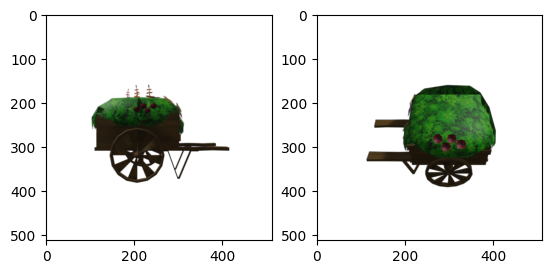

In [ ]:
index = 3457
image1 = read_image(df["image_path"].iloc[index])
image2 = read_image(df["image_path2"].iloc[index])
camera = df[[str(i) for i in range(3)]].iloc[index].to_numpy()
print('Camera: ', camera)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(  image1.permute(1, 2, 0)  )
fig.add_subplot(1, 2, 2)
plt.imshow(  image2.permute(1, 2, 0)  )
plt.show()

## Description Data [SKIP]
Let's add description data

In [ ]:
rel_df = pd.read_csv(drive_path+"sph_rel.csv", dtype = {'image_id': str, 'image_id2':str})

In [ ]:
rel_df.head()

model_id image_id  \
0  000074a334c541878360457c672b6c2e      019   
1  000074a334c541878360457c672b6c2e      019   
2  000074a334c541878360457c672b6c2e      019   
3  000074a334c541878360457c672b6c2e      019   
4  000074a334c541878360457c672b6c2e      019   

                                          image_path         0         1  \
0  /content/000-000/000074a334c541878360457c672b6... -0.449490  0.615480   
1  /content/000-000/000074a334c541878360457c672b6... -0.449489  0.615480   
2  /content/000-000/000074a334c541878360457c672b6...  0.000000  0.000000   
3  /content/000-000/000074a334c541878360457c672b6... -0.449490 -0.169918   
4  /content/000-000/000074a334c541878360457c672b6... -0.449490 -0.955317   

          2 image_id2                                        image_path2  
0 -0.523599       015  /content/000-000/000074a334c541878360457c672b6...  
1  1.047198       016  /content/000-000/000074a334c541878360457c672b6...  
2  2.094395       020  /content/000-000/000074a334c541878360457c672b6...  
3 -2.094395       018  /content/000-000/000074a334c541878360457c672b6...  
4 -0.523599       014  /content/000-000/000074a334c541878360457c672b6...

In [ ]:
hf_hub_download(repo_id="allenai/objaverse", filename="metadata/000-000.json.gz", repo_type="dataset", local_dir=data_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


000-000.json.gz:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

'/content/000-000/metadata/000-000.json.gz'

In [ ]:
#read the data
with gzip.open(os.path.join(data_path, "metadata/000-000.json.gz"), 'rb') as f:
    metadata = json.loads(f.read())

In [ ]:
#trim usless attributes. We are interested only in tag, categories, description and uid
annotations = []
for uid, x in metadata.items():
  tags = []
  for tag in x['tags']:
    tags.append(tag['name'])
  categories = []
  for cat in x['categories']:
    categories.append(cat['name'])
  name = x['name']
  description = x['description']
  annotations.append({'model_id': uid, 'name': name, 'tags':tags, 'categories':categories, 'description': description})

In [ ]:
annotations[:2]

[{'model_id': '94db219c315742909fee67deeeacae15',
  'name': 'knife',
  'tags': ['game-ready',
   'damascus',
   'damascus_steel',
   'kabar-knife',
   'knife',
   'blender',
   'blender3d',
   'gameready'],
  'categories': ['weapons-military'],
  'description': ''},
 {'model_id': 'fc1339e225b7408caec82681be2746c5',
  'name': 'Medieval Punishment',
  'tags': ['medieval',
   'torture',
   'handcuffs',
   'lowpoly',
   'gameready',
   'medieval-decor'],
  'categories': ['weapons-military'],
  'description': 'Medieval Punishment.<b>\nIncluding FBX and OBJ format<b>\n  Low Poly - Game Ready<b>\nTexture map size - 4096x4096<b>\n Created in Maya 2021<b>'}]

In [ ]:
#append the new info to the previous dataframe.
annotations = pd.DataFrame(annotations)
rel_df = rel_df.merge(annotations, on = 'model_id')
rel_df.head()

model_id image_id  \
0  000074a334c541878360457c672b6c2e      019   
1  000074a334c541878360457c672b6c2e      019   
2  000074a334c541878360457c672b6c2e      019   
3  000074a334c541878360457c672b6c2e      019   
4  000074a334c541878360457c672b6c2e      019   

                                          image_path         0         1  \
0  /content/000-000/000074a334c541878360457c672b6... -0.449490  0.615480   
1  /content/000-000/000074a334c541878360457c672b6... -0.449489  0.615480   
2  /content/000-000/000074a334c541878360457c672b6...  0.000000  0.000000   
3  /content/000-000/000074a334c541878360457c672b6... -0.449490 -0.169918   
4  /content/000-000/000074a334c541878360457c672b6... -0.449490 -0.955317   

          2 image_id2                                        image_path2  \
0 -0.523599       015  /content/000-000/000074a334c541878360457c672b6...   
1  1.047198       016  /content/000-000/000074a334c541878360457c672b6...   
2  2.094395       020  /content/000-000/000074a334c541878360457c672b6...   
3 -2.094395       018  /content/000-000/000074a334c541878360457c672b6...   
4 -0.523599       014  /content/000-000/000074a334c541878360457c672b6...   

             name                                               tags  \
0  Worn Flip Flop  [soft, gray, shoes, foam, realistic, beach, sc...   
1  Worn Flip Flop  [soft, gray, shoes, foam, realistic, beach, sc...   
2  Worn Flip Flop  [soft, gray, shoes, foam, realistic, beach, sc...   
3  Worn Flip Flop  [soft, gray, shoes, foam, realistic, beach, sc...   
4  Worn Flip Flop  [soft, gray, shoes, foam, realistic, beach, sc...   

                        categories  \
0  [fashion-style, sports-fitness]   
1  [fashion-style, sports-fitness]   
2  [fashion-style, sports-fitness]   
3  [fashion-style, sports-fitness]   
4  [fashion-style, sports-fitness]   

                                         description  
0  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...  
1  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...  
2  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...  
3  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...  
4  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...

In [ ]:
rel_df.to_csv(data_path+"sph_rel.csv", index = False)

In [ ]:
rel_df.to_csv(drive_path+"sph_rel.csv", index = False)

## Dataset declaration

In [5]:
#create datasets class for our data
from transformers import AutoTokenizer, PretrainedConfig

class CustomImageDataset(Dataset):
    def __init__(self, df, transform=None, target_transform=None, channels: int=3, delete_prob: float=0.5):
      tokenizer = AutoTokenizer.from_pretrained(
            "pt-sk/stable-diffusion-1.5", #"runwayml/stable-diffusion-v1-5"
            subfolder="tokenizer",
            revision=None,
            use_fast=False,
        )
      texts = [re.sub("[\[\]]", ' ', str(x)+str(y)+str(z)) for x, y, z in zip(df['tags'], df['categories'], df['description'])]
      self.tokenized = tokenizer(texts, max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt").input_ids
      self.df = df
      self.transform = transform
      self.target_transform = target_transform
      self.channels = channels
      self.delete_prob = delete_prob
      self.empty_text = tokenizer('', max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt").input_ids[0]

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        img_path = self.df['image_path'].iloc[idx]
        target_img_path = self.df['image_path2'].iloc[idx]
        image = read_image(img_path)
        target_image = read_image(target_img_path)
        image = image[:self.channels, :, :]
        target_image = target_image[:self.channels, :, :]
        if np.random.random() < self.delete_prob:
          label = self.empty_text
        else:
          label = self.tokenized[idx, :]
        camera = self.df[[str(i) for i in range(3)]].iloc[idx].to_numpy()
        camera = torch.Tensor(camera)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            target_image = self.target_transform(target_image)
        return image, label, camera, target_image

In [6]:
#DATASETS
from torchvision.transforms import v2
resolution = 512
channels = 3

image_transforms = v2.Compose(
    [
        v2.Resize(resolution, interpolation=v2.InterpolationMode.BILINEAR),
        v2.CenterCrop(resolution),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize([0.5], [0.5])  #is needed?
    ]
)

conditioning_image_transforms = v2.Compose(
    [
        v2.Resize(resolution, interpolation=v2.InterpolationMode.BILINEAR),
        v2.CenterCrop(resolution),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True)
    ]
)

## Load Small or Large Dataset

In [ ]:
##############################
######## READ COMMENT ########
##############################

use_small_split = True

In [ ]:
df = pd.read_csv(drive_path+"sph_rel.csv", dtype = {'image_id': str, 'image_id2':str, 'description':str}, na_filter = False)

In [ ]:
df.head()

model_id image_id  \
0  000074a334c541878360457c672b6c2e      019   
1  000074a334c541878360457c672b6c2e      019   
2  000074a334c541878360457c672b6c2e      019   
3  000074a334c541878360457c672b6c2e      019   
4  000074a334c541878360457c672b6c2e      019   

                                          image_path         0         1  \
0  /content/000-000/000074a334c541878360457c672b6... -0.449490  0.615480   
1  /content/000-000/000074a334c541878360457c672b6... -0.449489  0.615480   
2  /content/000-000/000074a334c541878360457c672b6...  0.000000  0.000000   
3  /content/000-000/000074a334c541878360457c672b6... -0.449490 -0.169918   
4  /content/000-000/000074a334c541878360457c672b6... -0.449490 -0.955317   

          2 image_id2                                        image_path2  \
0 -0.523599       015  /content/000-000/000074a334c541878360457c672b6...   
1  1.047198       016  /content/000-000/000074a334c541878360457c672b6...   
2  2.094395       020  /content/000-000/000074a334c541878360457c672b6...   
3 -2.094395       018  /content/000-000/000074a334c541878360457c672b6...   
4 -0.523599       014  /content/000-000/000074a334c541878360457c672b6...   

             name                                               tags  \
0  Worn Flip Flop  ['soft', 'gray', 'shoes', 'foam', 'realistic',...   
1  Worn Flip Flop  ['soft', 'gray', 'shoes', 'foam', 'realistic',...   
2  Worn Flip Flop  ['soft', 'gray', 'shoes', 'foam', 'realistic',...   
3  Worn Flip Flop  ['soft', 'gray', 'shoes', 'foam', 'realistic',...   
4  Worn Flip Flop  ['soft', 'gray', 'shoes', 'foam', 'realistic',...   

                            categories  \
0  ['fashion-style', 'sports-fitness']   
1  ['fashion-style', 'sports-fitness']   
2  ['fashion-style', 'sports-fitness']   
3  ['fashion-style', 'sports-fitness']   
4  ['fashion-style', 'sports-fitness']   

                                         description  
0  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...  
1  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...  
2  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...  
3  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...  
4  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...

In [ ]:
#SPLITS
train_df, test_df = train_test_split(df, test_size=.2, random_state=420)
train_df, val_df = train_test_split(train_df, test_size=.3, random_state=420)
if use_small_split:
  small_df, train_df = train_test_split(train_df, test_size=.99, random_state=420)
print(f"train_df: {train_df.shape}, val_df:{val_df.shape}, test_df: {test_df.shape}, small_df: {small_df.shape}")


train_df: (365904, 12), val_df:(158400, 12), test_df: (132000, 12), small_df: (3696, 12)


In [ ]:
if not use_small_split:
  train_dataset = CustomImageDataset(train_df, transform = image_transforms, target_transform = conditioning_image_transforms, channels=channels)
  val_dataset = CustomImageDataset(val_df, transform = ToTensor(), target_transform=ToTensor(), channels=channels)
  test_dataset = CustomImageDataset(test_df, transform = ToTensor(), target_transform=ToTensor(), channels=channels)
else:
  train_dataset = CustomImageDataset(small_df, transform = image_transforms, target_transform = conditioning_image_transforms, channels=channels)

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

In [ ]:
#testing
image1, label, camera, image2 = train_dataset.__getitem__(50)
image1.shape

torch.Size([3, 512, 512])

Label:  tensor([49406, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407])
Camera:  tensor([ 0.4495, -0.9553,  2.6180])
<class 'torchvision.tv_tensors._image.Image'>


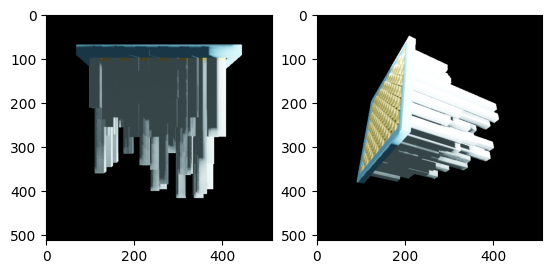

In [ ]:
image1, label, camera, image2 = train_dataset.__getitem__(456)
print('Label: ', label)
print('Camera: ', camera)
print(type(image1))
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(  image1.permute(1, 2, 0)  )
fig.add_subplot(1, 2, 2)
plt.imshow(  image2.permute(1, 2, 0)  )
plt.show()

### Cleaning df by CLIP score [SKIP]

I will use this small subsection to try this stuff out

In [ ]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel, CLIPTokenizerFast

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
url = 'https://www.magicmurals.com/media/amasty/webp/catalog/product/cache/155d73b570b90ded8a140526fcb8f2da/d/p/dpx-0001975184_jpg.webp'
image = Image.open(requests.get(url, stream=True).raw)

prompts = ['a picture of a turtle',
           'a picture of a turtle peacefully swimming in the sea',
           'a picture of a turtle peacefully swimming in the sea, you can see algae on the ocean floor',
           'a picture of an acquatic animal',
           'a picture of a crustacean', # Noice! Turtles are not crustaceans! Model scores this at 22.9915828704834
           'a picture of a reptile', # They are, in fact, reptiles and the model gives it a score of 25.321945190429688
           'a picture of me taking a shower', # Don't worry I didn't hide picture of me taking a shower inside this notebook (maybe)
           'a picture of me driving a car',
           'a picture of a cat playing with a plush']

inputs = processor(text=prompts, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image

pd.DataFrame(list(zip(prompts, logits_per_image[0])), columns=['Prompt', 'CLIP Logit'])

Prompt  \
0                              a picture of a turtle   
1  a picture of a turtle peacefully swimming in t...   
2  a picture of a turtle peacefully swimming in t...   
3                    a picture of an acquatic animal   
4                          a picture of a crustacean   
5                             a picture of a reptile   
6                    a picture of me taking a shower   
7                      a picture of me driving a car   
8            a picture of a cat playing with a plush   

                                   CLIP Logit  
0  tensor(29.5193, grad_fn=<UnbindBackward0>)  
1  tensor(29.8239, grad_fn=<UnbindBackward0>)  
2  tensor(31.6534, grad_fn=<UnbindBackward0>)  
3  tensor(28.3399, grad_fn=<UnbindBackward0>)  
4  tensor(22.9916, grad_fn=<UnbindBackward0>)  
5  tensor(25.3219, grad_fn=<UnbindBackward0>)  
6  tensor(21.3458, grad_fn=<UnbindBackward0>)  
7  tensor(18.9374, grad_fn=<UnbindBackward0>)  
8  tensor(13.3952, grad_fn=<UnbindBackward0>)

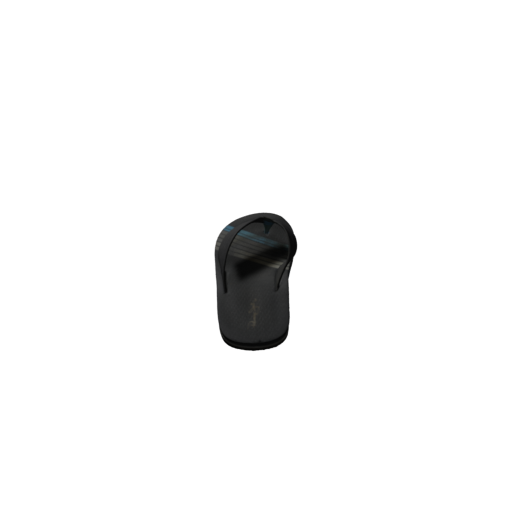

In [ ]:
tester = df.iloc[40, :]
image = Image.open(tester['image_path'])
image

In [ ]:
tester['description']

'** Worn Flip Flop **\n\n*Anti Shock Cushioned Foam with Non Slip Rubber Outsole*\n\n*29.2 x 11.8 x 7.6 cm (85 micrometers per texel @ 4k)*\n\nScanned using advanced technology developed by inciprocal Inc. that enables highly photo-realistic reproduction of real-world products in virtual environments. Our hardware and software technology combines advanced photometry, structured light, photogrammtery and light fields to capture and generate accurate material representations from tens of thousands of images targeting real-time and offline path-traced PBR compatible renderers.\n\nZip file includes low-poly OBJ mesh (in meters) with a set of 4k PBR textures compressed with *lossless* JPEG (no chroma sub-sampling).'

In [ ]:
inputs = processor(text=tester['description'], images=image, return_tensors="pt", padding=True, truncation=True)

outputs = model(**inputs)
outputs.logits_per_image

tensor([[25.6025]], grad_fn=<TBackward0>)

In [ ]:
bat = df[df['model_id']=='0028b77436394fd7963c013e04e69e70'].iloc[0, :]
img_1 = Image.open(bat['image_path'])
img_2 = Image.open(bat['image_path2'])
desc = bat['description']

Score: 24.371904373168945


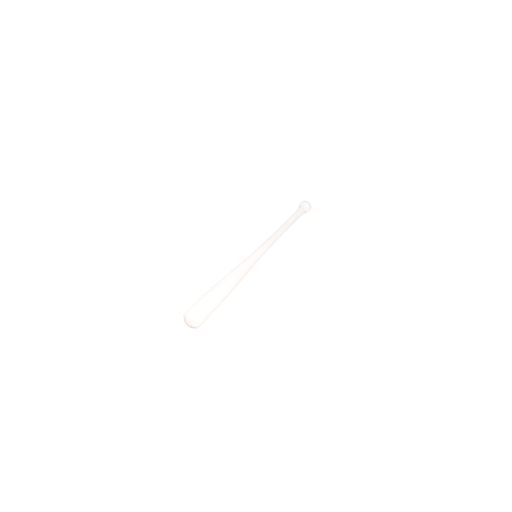

In [ ]:
# Testing how view of the same obj affect score

inputs = processor(text=desc, images=img_1, return_tensors="pt", padding=True, truncation=True)

outputs = model(**inputs)
outputs.logits_per_image
print(f'Score: {float(outputs.logits_per_image[0][0])}')
img_1

Score: 14.962361335754395


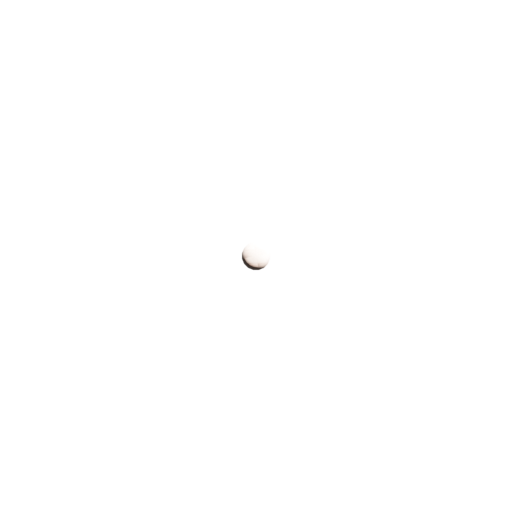

In [ ]:
inputs = processor(text=desc, images=img_2, return_tensors="pt", padding=True, truncation=True)

outputs = model(**inputs)
outputs.logits_per_image
print(f'Score: {float(outputs.logits_per_image[0][0])}')
img_2

As expected, more than one image should be taken into consideration (maybe 3?) to compute the clip score, since there are some views of the same object that are somewhat "unlucky"

In [ ]:
uniq_df = []
for mid in df['model_id'].unique():
  uniq_df.append(df[df['model_id']==mid].sample(3))
uniq_df = pd.concat(uniq_df)

In [ ]:
#######################################################
### DON'T RUN THIS CODE CELL IF YOU VALUE YOUR TIME ###
## I ALREADY DID IT FOR YOU, JUST LOAD THE DATAFRAME ##
#######################################################

dict_scores = {}
dict_keys = ['tags', 'categories', 'description', 'tags&cats', 'desc&tags', 'desc&cats', 'all']
for mid in tqdm(uniq_df['model_id'].unique()):
  tmp = uniq_df[uniq_df['model_id']==mid]
  images_paths = list(tmp['image_path'].unique()) + list(tmp['image_path2'].unique())
  assert len(tmp['description'].unique()==1)
  assert len(tmp['tags'].unique()==1)
  assert len(tmp['categories'].unique()==1)
  images = [Image.open(pth) for pth in images_paths]
  columns = ['tags', 'categories', 'description']
  texts = list(tmp.iloc[0][columns])
  tags = texts[0]
  cats = texts[1]
  for char in ['[', ']', '\'', ',']:
    tags = tags.replace(char, '')
    cats = cats.replace(char, '')

  inputs = processor(text=[tags, cats, texts[2], tags + ' ' + cats, texts[2] + ' ' + tags, texts[2] + ' ' + cats, texts[2] + ' ' + tags + ' ' + cats],
                     images=images, return_tensors="pt", padding=True, truncation=True)
  outputs = model(**inputs)
  out = outputs.logits_per_image.mean(axis=0)
  dict_scores[mid] = {dict_keys[i]: float(score) for i, score in enumerate(out)}

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
def attach_CLIP(v):
  mid = v['model_id']
  scores = dict_scores[mid]
  return pd.Series([scores[k] for k in dict_keys])

col_names = ['CLIP Score tags',
             'CLIP Score categories',
             'CLIP Score description',
             'CLIP Score tags and category',
             'CLIP Score description and tags',
             'CLIP Score description and categories',
             'CLIP Score all']

df[col_names] = df.apply(attach_CLIP, axis=1)

In [ ]:
df.to_csv('/content/drive/MyDrive/ML4CV_poject/CLIP_sph_df.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML4CV_poject/CLIP_sph_df.csv', dtype = {'image_id': str, 'image_id2':str, 'description':str}, na_filter = False)

In [ ]:
uniq_df = []
for mid in df['model_id'].unique():
  uniq_df.append(df[df['model_id']==mid].sample(1))
uniq_df = pd.concat(uniq_df)

In [ ]:
col_names = ['CLIP Score tags',
             'CLIP Score categories',
             'CLIP Score description',
             'CLIP Score tags and category',
             'CLIP Score description and tags',
             'CLIP Score description and categories',
             'CLIP Score all']

uniq_df[col_names].describe()

CLIP Score tags  CLIP Score categories  CLIP Score description  \
count      5000.000000            5000.000000             5000.000000   
mean         24.005605              22.931568               24.109486   
std           2.620091               1.379416                2.824252   
min          13.838078              16.731691               12.801559   
25%          22.638500              22.270182               22.633124   
50%          23.566892              23.109525               23.577795   
75%          25.067321              23.773365               25.251227   
max          37.441692              28.503702               36.804150   

       CLIP Score tags and category  CLIP Score description and tags  \
count                   5000.000000                      5000.000000   
mean                      23.689898                        24.276573   
std                        2.535871                         3.071997   
min                       13.490365                        12.925451   
25%                       22.407698                        22.499870   
50%                       23.441068                        23.712311   
75%                       24.777389                        25.854264   
max                       37.103928                        38.761066   

       CLIP Score description and categories  CLIP Score all  
count                            5000.000000     5000.000000  
mean                               23.940496       24.115915  
std                                 2.800836        2.990061  
min                                12.097260       11.847196  
25%                                22.424865       22.412863  
50%                                23.534650       23.653991  
75%                                25.159972       25.599380  
max                                36.585037       35.654957

Soooooo from the describe only seems that only the description could work... Notce that the scores regarding the all column (desc+tags+cat) it's very similar but is a lot more tokens to process for basically the same performances.

In [ ]:
import seaborn as sns

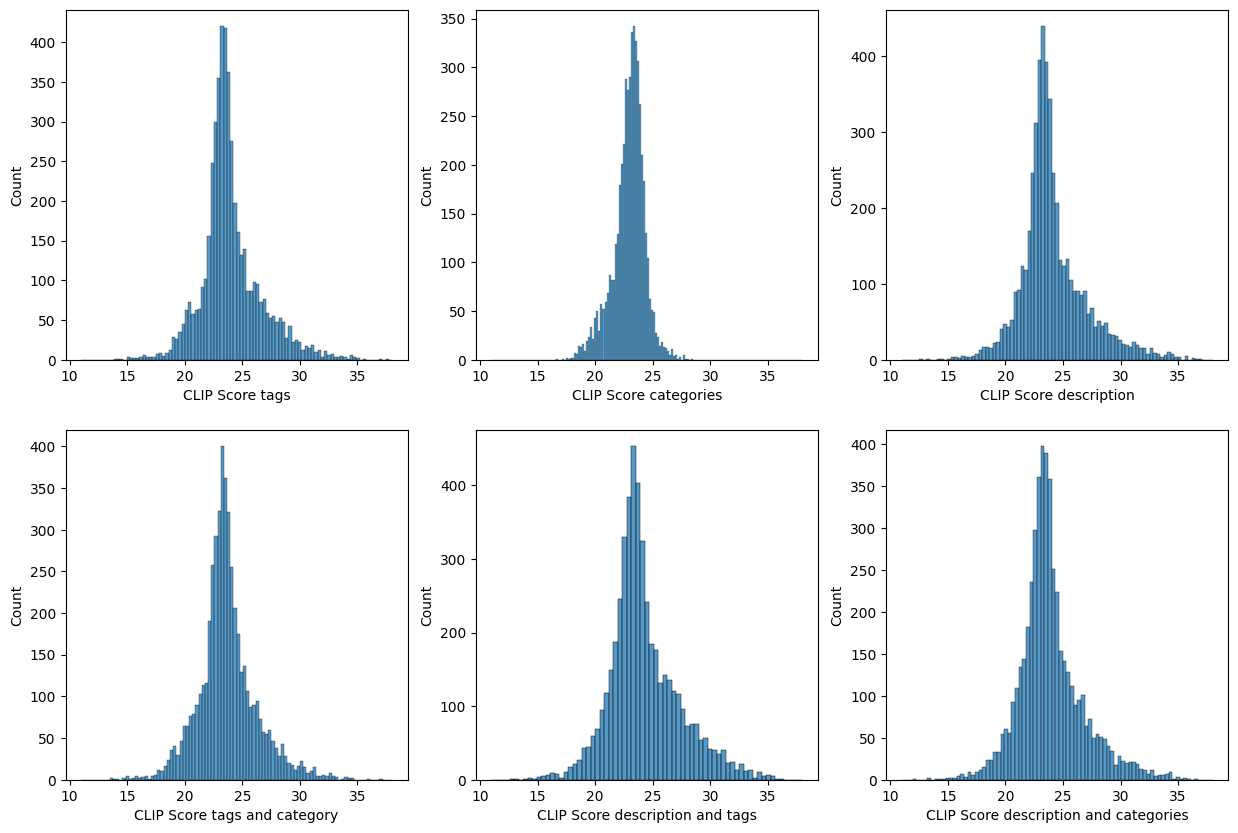

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(col_names[:-1]):
  sns.histplot(uniq_df[col], binrange=(11, 38), ax=ax[i//3][i%3])

Mural by Pete Fowler

20 Wilson St, Hamilton, Ontario

Created with Polycam
['graffiti', 'iphone12pro', 'polycam']
Description Score: 19.662399291992188
Tags Score: 20.12296295166016
Desc + Tags Score: 17.59120750427246


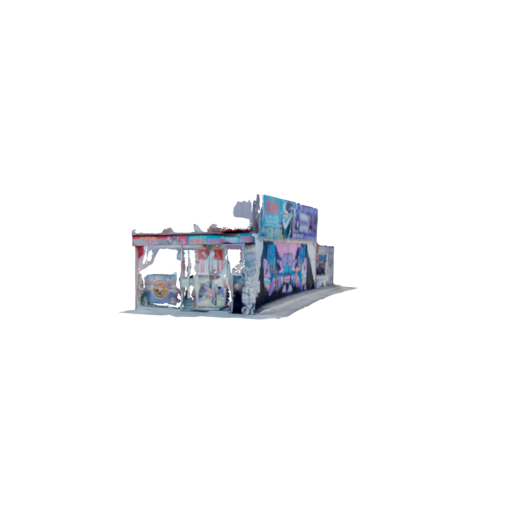

In [ ]:
tmp = uniq_df[uniq_df['CLIP Score description and tags'] < 18]
sample = tmp.sample(1)
print(sample['description'].iloc[0])
print(sample['tags'].iloc[0])
print(f'Description Score: {sample["CLIP Score description"].iloc[0]}')
print(f'Tags Score: {sample["CLIP Score tags"].iloc[0]}')
print(f'Desc + Tags Score: {sample["CLIP Score description and tags"].iloc[0]}')
Image.open(sample['image_path'].iloc[0])

### Addressing white images [SKIP]

In [ ]:
white_id = uniq_df[uniq_df['description'].str.contains("High-density point-cloud export from Scaniverse")]
white_id

Unnamed: 0                          model_id image_id  \
254081      254081  3b870dc505c54074bf60e058fc3eb6d4      013   

                                               image_path        0        1  \
254081  /content/000-000/3b870dc505c54074bf60e058fc3eb...  0.44949 -0.61548   

               2 image_id2                                        image_path2  \
254081 -0.523599       020  /content/000-000/3b870dc505c54074bf60e058fc3eb...   

                                name  \
254081  Central Walkway [Scaniverse]   

                                                   tags         categories  \
254081  ['point', '3dscan', 'pointcloud', 'scaniverse']  ['nature-plants']   

                                            description  CLIP Score tags  \
254081  High-density point-cloud export from Scaniverse        19.765862   

        CLIP Score categories  CLIP Score description  \
254081               21.84971               17.685503   

        CLIP Score tags and category  CLIP Score description and tags  \
254081                     18.591125                        16.948378   

        CLIP Score description and categories  CLIP Score all  
254081                              16.874285       17.178102

In [ ]:
white_imgs = df[df['model_id'] == '3b870dc505c54074bf60e058fc3eb6d4']
white_imgs

Unnamed: 0                          model_id image_id  \
253968      253968  3b870dc505c54074bf60e058fc3eb6d4      019   
253969      253969  3b870dc505c54074bf60e058fc3eb6d4      019   
253970      253970  3b870dc505c54074bf60e058fc3eb6d4      019   
253971      253971  3b870dc505c54074bf60e058fc3eb6d4      019   
253972      253972  3b870dc505c54074bf60e058fc3eb6d4      019   
...            ...                               ...      ...   
254095      254095  3b870dc505c54074bf60e058fc3eb6d4      012   
254096      254096  3b870dc505c54074bf60e058fc3eb6d4      012   
254097      254097  3b870dc505c54074bf60e058fc3eb6d4      012   
254098      254098  3b870dc505c54074bf60e058fc3eb6d4      012   
254099      254099  3b870dc505c54074bf60e058fc3eb6d4      012   

                                               image_path             0  \
253968  /content/000-000/3b870dc505c54074bf60e058fc3eb... -4.494898e-01   
253969  /content/000-000/3b870dc505c54074bf60e058fc3eb... -4.494893e-01   
253970  /content/000-000/3b870dc505c54074bf60e058fc3eb...  0.000000e+00   
253971  /content/000-000/3b870dc505c54074bf60e058fc3eb... -4.494898e-01   
253972  /content/000-000/3b870dc505c54074bf60e058fc3eb... -4.494898e-01   
...                                                   ...           ...   
254095  /content/000-000/3b870dc505c54074bf60e058fc3eb...  4.494898e-01   
254096  /content/000-000/3b870dc505c54074bf60e058fc3eb...  4.494898e-01   
254097  /content/000-000/3b870dc505c54074bf60e058fc3eb... -5.000000e-07   
254098  /content/000-000/3b870dc505c54074bf60e058fc3eb... -3.000000e-07   
254099  /content/000-000/3b870dc505c54074bf60e058fc3eb... -5.000000e-07   

                   1         2 image_id2  \
253968  6.154796e-01 -0.523599       015   
253969  6.154799e-01  1.047198       016   
253970  0.000000e+00  2.094395       020   
253971 -1.699185e-01 -2.094395       018   
253972 -9.553167e-01 -0.523599       014   
...              ...       ...       ...   
254095  6.154798e-01  2.094395       022   
254096  6.154798e-01 -2.094395       023   
254097  1.570796e+00  1.570796       017   
254098  7.853981e-01  0.000000       021   
254099 -1.000000e-07 -1.570796       013   

                                              image_path2  \
253968  /content/000-000/3b870dc505c54074bf60e058fc3eb...   
253969  /content/000-000/3b870dc505c54074bf60e058fc3eb...   
253970  /content/000-000/3b870dc505c54074bf60e058fc3eb...   
253971  /content/000-000/3b870dc505c54074bf60e058fc3eb...   
253972  /content/000-000/3b870dc505c54074bf60e058fc3eb...   
...                                                   ...   
254095  /content/000-000/3b870dc505c54074bf60e058fc3eb...   
254096  /content/000-000/3b870dc505c54074bf60e058fc3eb...   
254097  /content/000-000/3b870dc505c54074bf60e058fc3eb...   
254098  /content/000-000/3b870dc505c54074bf60e058fc3eb...   
254099  /content/000-000/3b870dc505c54074bf60e058fc3eb...   

                                name  \
253968  Central Walkway [Scaniverse]   
253969  Central Walkway [Scaniverse]   
253970  Central Walkway [Scaniverse]   
253971  Central Walkway [Scaniverse]   
253972  Central Walkway [Scaniverse]   
...                              ...   
254095  Central Walkway [Scaniverse]   
254096  Central Walkway [Scaniverse]   
254097  Central Walkway [Scaniverse]   
254098  Central Walkway [Scaniverse]   
254099  Central Walkway [Scaniverse]   

                                                   tags         categories  \
253968  ['point', '3dscan', 'pointcloud', 'scaniverse']  ['nature-plants']   
253969  ['point', '3dscan', 'pointcloud', 'scaniverse']  ['nature-plants']   
253970  ['point', '3dscan', 'pointcloud', 'scaniverse']  ['nature-plants']   
253971  ['point', '3dscan', 'pointcloud', 'scaniverse']  ['nature-plants']   
253972  ['point', '3dscan', 'pointcloud', 'scaniverse']  ['nature-plants']   
...                                                 ...                ...   
254095  ['point', '3dscan', 'pointclo

In [ ]:
import torchvision
from tqdm import tqdm
from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
torchvision.io.read_image(white_imgs.sample(1)['image_path2'].iloc[0]).unique() # le immagini bianche contengono solo 0 e 1

tensor([0, 1], dtype=torch.uint8)

In [ ]:
# Non è necessario far girare questa e la prossima cella
# Carico da file salvato nelle prossime celle

def find_white_images(value, white_models, paths):
  model_id = value['model_id']
  if model_id in white_models: return
  path1 = value['image_path']
  if path1 not in paths:
    paths.add(path1)
    un = torchvision.io.read_image(path1).unique()
    if len(un) == 2:
      white_models.add(model_id)
      return
  path2 = value['image_path2']
  if path2 not in paths:
    paths.add(path2)
    un = torchvision.io.read_image(path2).unique()
    if len(un) == 2:
      white_models.add(model_id)
      return
  return

path_set = set({})
model_set = set({})
df.progress_apply(lambda x: find_white_images(x, model_set, path_set), axis=1)

  0%|          | 0/660000 [00:00<?, ?it/s]

0         None
1         None
2         None
3         None
4         None
          ... 
659995    None
659996    None
659997    None
659998    None
659999    None
Length: 660000, dtype: object

In [ ]:
with open('/content/drive/MyDrive/ML4CV_poject/white_models.txt', 'r') as f:
  model_set = set(f.read().split('\n')[:-1])
  f.close()

In [ ]:
def make_collage(model_id):
  rows = df[df['model_id']==model_id]
  img_paths = pd.concat([rows['image_path'], rows['image_path2']]).unique()
  print(f'Description: {rows.iloc[0, :]["description"]}')
  print(f'Tags: {rows.iloc[0, :]["tags"]}')
  imgs = [Image.open(pth) for pth in img_paths]
  new_img_size = (512*3, 512*(len(img_paths)//3))
  collage = Image.new('RGBA', new_img_size)
  for i, img in enumerate(imgs):
    collage.paste(img, (512*(i%3), 512*(i//3)))
  return collage

Description: ** Worn Flip Flop **

*Anti Shock Cushioned Foam with Non Slip Rubber Outsole*

*29.2 x 11.8 x 7.6 cm (85 micrometers per texel @ 4k)*

Scanned using advanced technology developed by inciprocal Inc. that enables highly photo-realistic reproduction of real-world products in virtual environments. Our hardware and software technology combines advanced photometry, structured light, photogrammtery and light fields to capture and generate accurate material representations from tens of thousands of images targeting real-time and offline path-traced PBR compatible renderers.

Zip file includes low-poly OBJ mesh (in meters) with a set of 4k PBR textures compressed with *lossless* JPEG (no chroma sub-sampling).
Tags: ['soft', 'gray', 'shoes', 'foam', 'realistic', 'beach', 'scanned', 'rubber', 'yoga', 'flipflop', 'photometry', 'flipflops', 'pbr-texturing', 'pbr-materials', 'inciprocal']


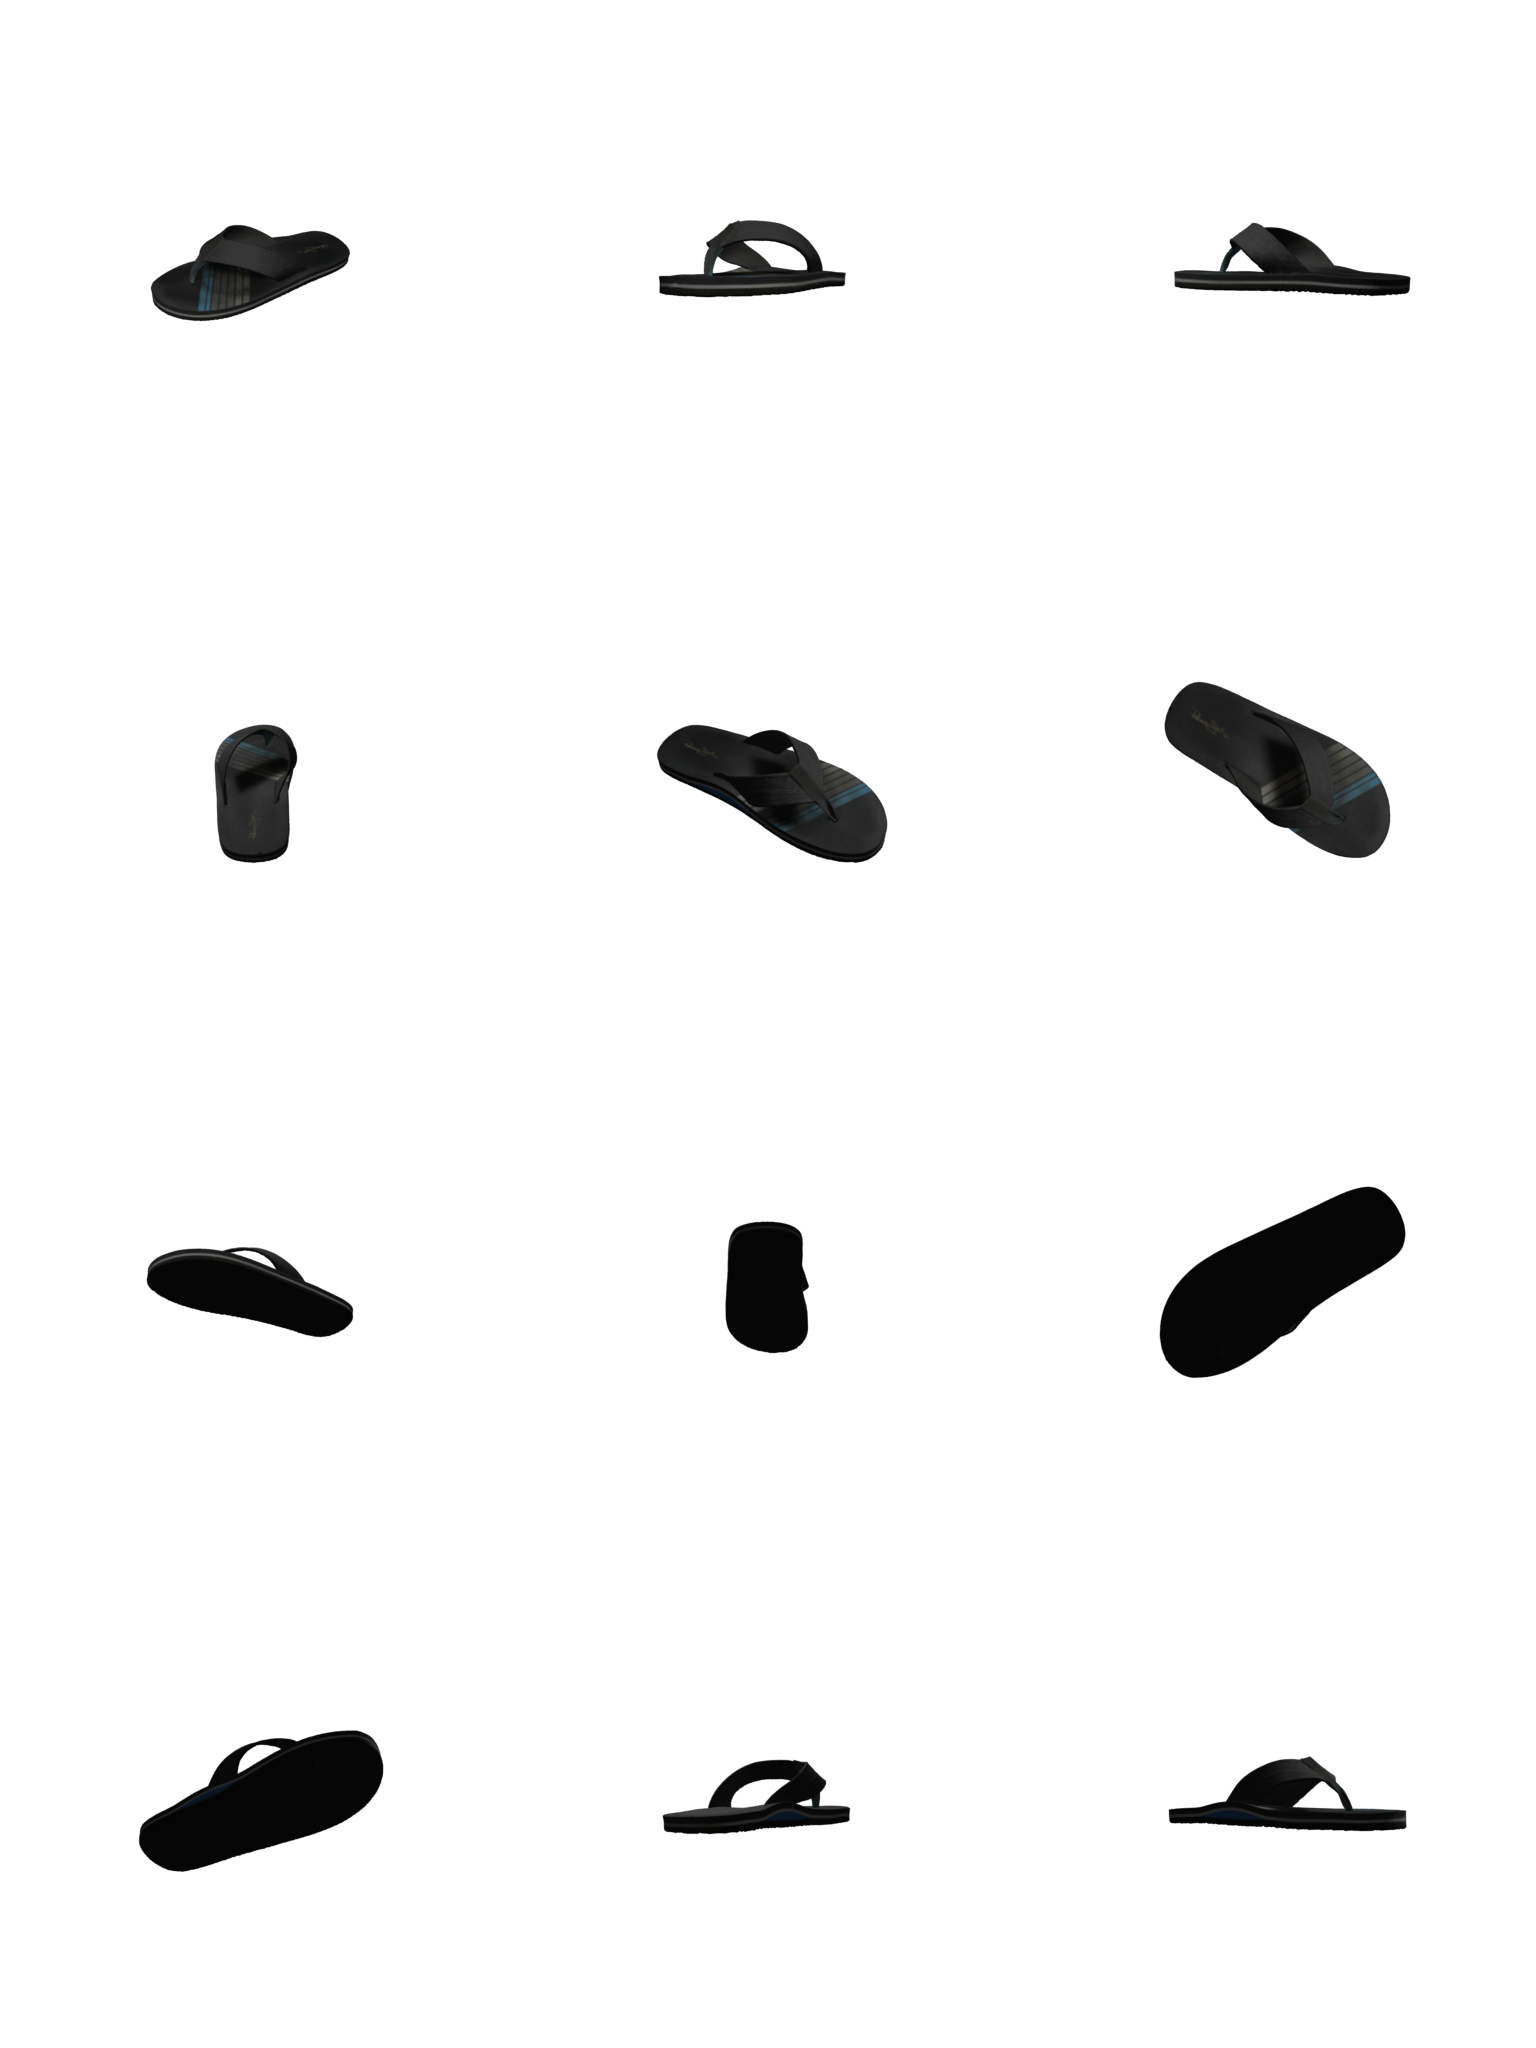

In [ ]:
mid = df.iloc[0, :]['model_id']
make_collage(mid)

Description: Game ui icons
Tags: ['icon', 'buttons', 'ui', 'game', 'mobile']


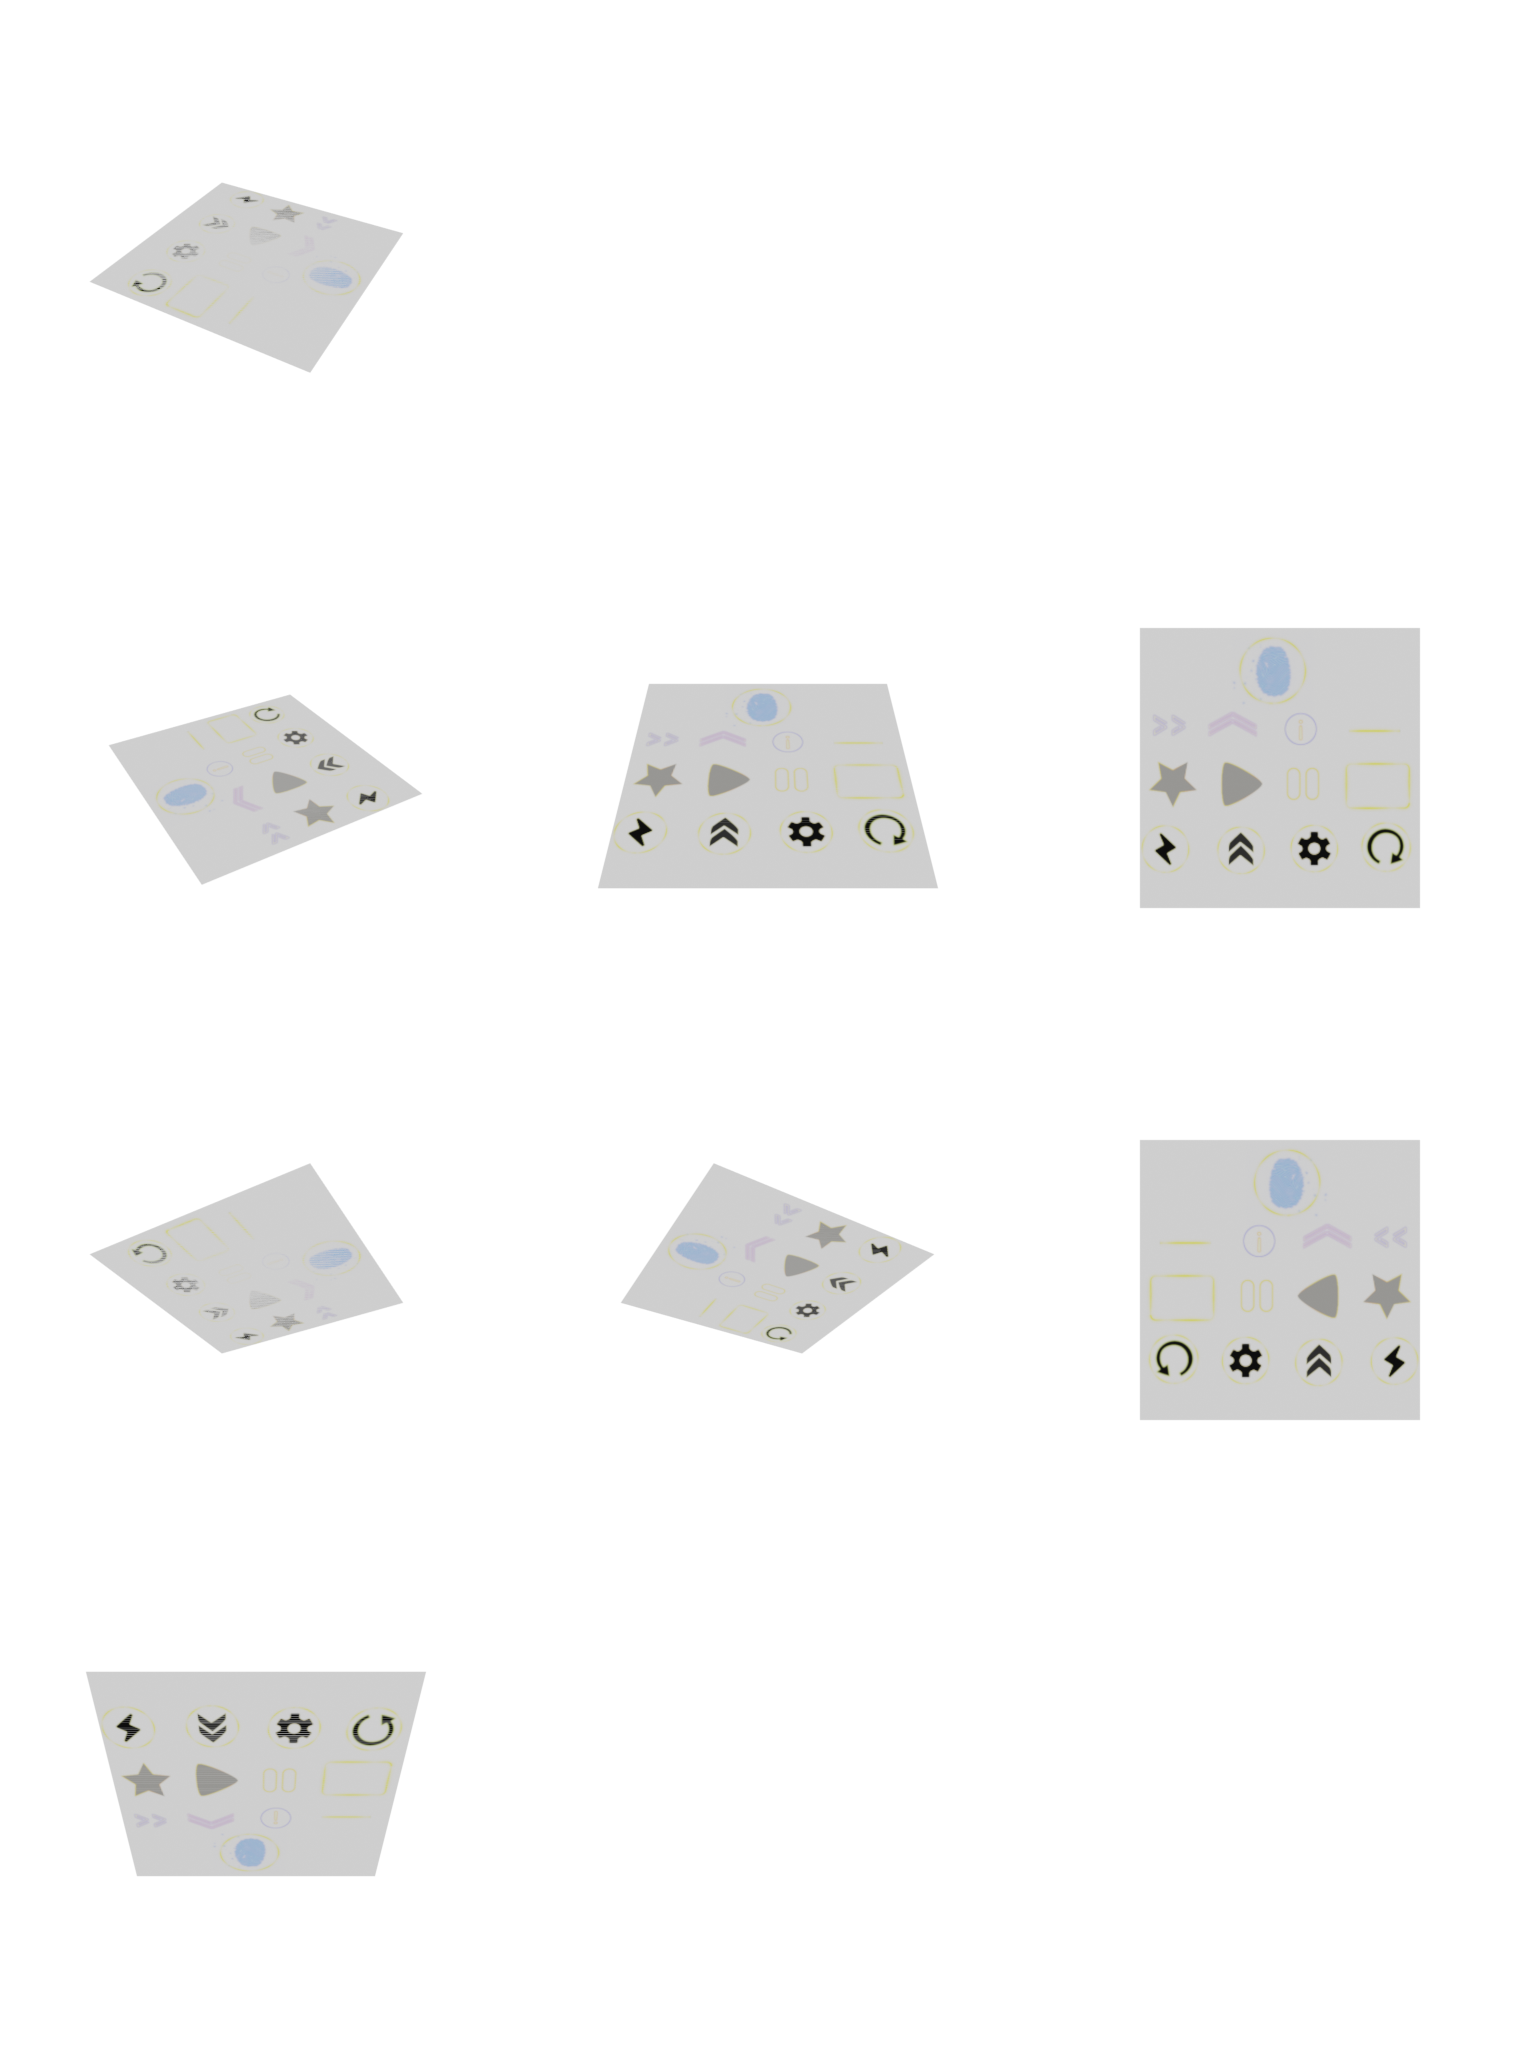

In [ ]:
# 6, 15, 22, 28, 34, 36, 40, 41, 42, 45
# Dei 48 modelli che il mio script aveva segnato come "immagini vuote"
# questi sono gli indici di quelli che hanno sia immagini normali che bianche
# dove le bianche sono spesso dovute alla prospettiva
# Alcuni di questi secondo me vanno comunque scartati, poi mi dirai

model = 42 # @param {type:"integer"}

white_models = sorted(model_set) # To ensure same order, casting to list may result in different order each time...
model = white_models[model]
make_collage(model)

## Load Overfit Dataset

Prima di tutto eliminiamo tutti i modelli sotto una determinata soglia per tag e descrizione. Per ora imposterò come soglia 22

In [7]:
df = pd.read_csv('./content/drive/MyDrive/ML4CV_poject/CLIP_sph_df.csv', dtype = {'image_id': str, 'image_id2':str, 'description':str}, na_filter = False)

In [8]:
df.head()

Unnamed: 0                          model_id image_id  \
0           0  000074a334c541878360457c672b6c2e      019   
1           1  000074a334c541878360457c672b6c2e      019   
2           2  000074a334c541878360457c672b6c2e      019   
3           3  000074a334c541878360457c672b6c2e      019   
4           4  000074a334c541878360457c672b6c2e      019   

                                          image_path         0         1  \
0  /content/000-000/000074a334c541878360457c672b6... -0.449490  0.615480   
1  /content/000-000/000074a334c541878360457c672b6... -0.449489  0.615480   
2  /content/000-000/000074a334c541878360457c672b6...  0.000000  0.000000   
3  /content/000-000/000074a334c541878360457c672b6... -0.449490 -0.169918   
4  /content/000-000/000074a334c541878360457c672b6... -0.449490 -0.955317   

          2 image_id2                                        image_path2  \
0 -0.523599       015  /content/000-000/000074a334c541878360457c672b6...   
1  1.047198       016  /content/000-000/000074a334c541878360457c672b6...   
2  2.094395       020  /content/000-000/000074a334c541878360457c672b6...   
3 -2.094395       018  /content/000-000/000074a334c541878360457c672b6...   
4 -0.523599       014  /content/000-000/000074a334c541878360457c672b6...   

             name                                               tags  \
0  Worn Flip Flop  ['soft', 'gray', 'shoes', 'foam', 'realistic',...   
1  Worn Flip Flop  ['soft', 'gray', 'shoes', 'foam', 'realistic',...   
2  Worn Flip Flop  ['soft', 'gray', 'shoes', 'foam', 'realistic',...   
3  Worn Flip Flop  ['soft', 'gray', 'shoes', 'foam', 'realistic',...   
4  Worn Flip Flop  ['soft', 'gray', 'shoes', 'foam', 'realistic',...   

                            categories  \
0  ['fashion-style', 'sports-fitness']   
1  ['fashion-style', 'sports-fitness']   
2  ['fashion-style', 'sports-fitness']   
3  ['fashion-style', 'sports-fitness']   
4  ['fashion-style', 'sports-fitness']   

                                         description  CLIP Score tags  \
0  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...        25.593315   
1  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...        25.593315   
2  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...        25.593315   
3  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...        25.593315   
4  ** Worn Flip Flop **\n\n*Anti Shock Cushioned ...        25.593315   

   CLIP Score categories  CLIP Score description  \
0              19.254406               25.181002   
1              19.254406               25.181002   
2              19.254406               25.181002   
3              19.254406               25.181002   
4              19.254406               25.181002   

   CLIP Score tags and category  CLIP Score description and tags  \
0                     24.614197                        25.181002   
1                     24.614197                        25.181002   
2                     24.614197                        25.181002   
3                     24.614197                        25.181002   
4                     24.614197                        25.181002   

   CLIP Score description and categories  CLIP Score all  
0                              25.181005       25.181005  
1                              25.181005       25.181005  
2                              25.181005       25.181005  
3                              25.181005       25.181005  
4                              25.181005       25.181005

In [9]:
#ONLY FOR LOCAL!
df['image_path'] = "."+df["image_path"]
df['image_path2'] = "."+df["image_path2"]

In [10]:
def delete_thr(df, thr, column='CLIP Score description and tags'):
  rem_df = df[df[column] <= thr]
  print(f'Removed {len(rem_df["model_id"].unique())} models. ({rem_df.shape[0]} rows)')
  return df[df[column] > thr].reset_index(drop=True)

In [11]:
clean_df = delete_thr(df, 24)

Removed 2771 models. (365772 rows)


Ora cerco di trovare dei modelli che mi piacciono da eliminare dal dataframe e da tenere come test **che non è presente nel train**.

In [12]:
good_models = clean_df[clean_df['CLIP Score description and tags'] > 35]['model_id'].unique()

In [13]:
good_models

array(['017c2dbbc5034eba8dbf46e44dbddb62',
       '0241e66e7f93462ea3cddfb1f326d753',
       '049a95c55864426da8e584c0d5c40b64',
       '054458467ab8477a99400979e826a560',
       '12f9ff84a68747dcbb7289447b741127',
       'ac8f59369cbe457bb1331e88f13d61af',
       'b3bfd8ec7a1849f0bade5298dc207340',
       'b59a7634e4ed43b0a5f7ae309253244e',
       'e4a7580acfc64090b98541b7ed60e2dd',
       'e4d2903fd8c643669c2d3b3ab081e5e7',
       'e82736ff838a478fbf2f2798ff325649'], dtype=object)

In [14]:
def make_collage(model_id):
  rows = df[df['model_id']==model_id]
  img_paths = pd.concat([rows['image_path'], rows['image_path2']]).unique()
  print(f'Description: {rows.iloc[0, :]["description"]}')
  print(f'Tags: {rows.iloc[0, :]["tags"]}')
  imgs = [Image.open(pth) for pth in img_paths]
  new_img_size = (512*3, 512*(len(img_paths)//3))
  collage = Image.new('RGBA', new_img_size)
  for i, img in enumerate(imgs):
    collage.paste(img, (512*(i%3), 512*(i//3)))
  return collage

Description: Green sphere created for self rotation to be incorporated into the menu of a website
Tags: ['soccerball', 'webgl-opengl']


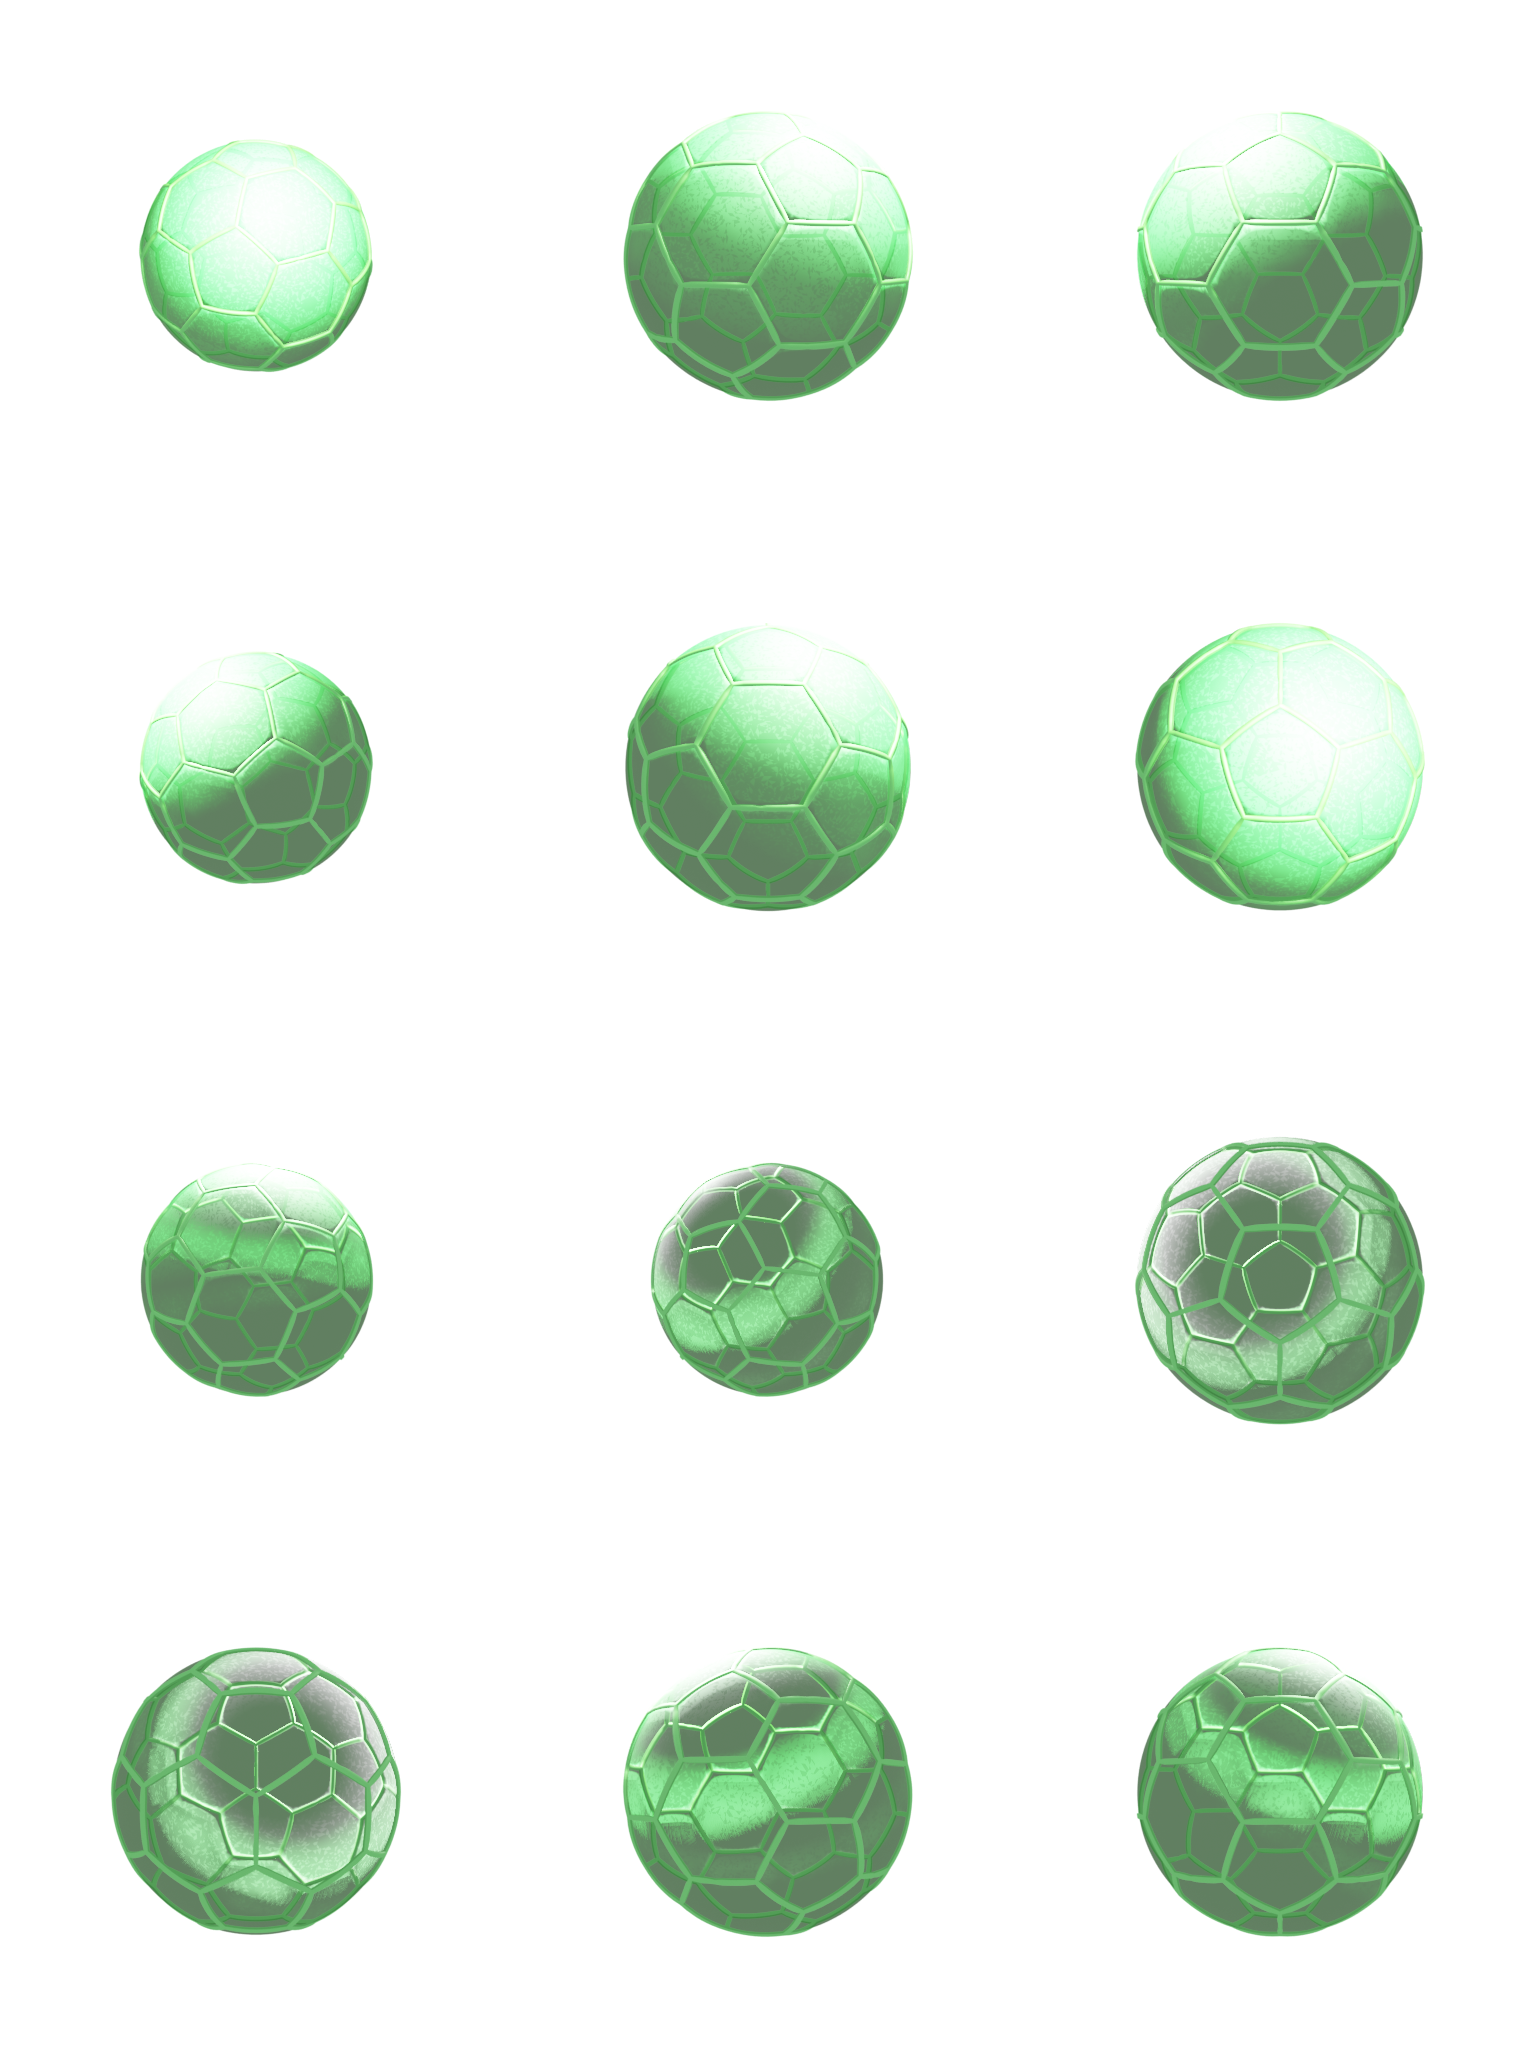

In [15]:
# 0098586123fc435f86c7f5cb3d3b8a79
# 017c2dbbc5034eba8dbf46e44dbddb62
# 5c3426b63be04d5b84c73d6ff77aeea8
# b59a7634e4ed43b0a5f7ae309253244e

model = 1 # @param {type:"integer"}

model = good_models[model]
make_collage(model)

In [16]:
# Ho selezionato questi 4 perché mi sembravano avere il giusto equilibrio tr complessità e semplicità, ma se ne può parlare

test_models = ['0098586123fc435f86c7f5cb3d3b8a79',
               '017c2dbbc5034eba8dbf46e44dbddb62',
               '5c3426b63be04d5b84c73d6ff77aeea8',
               'b59a7634e4ed43b0a5f7ae309253244e']

In [17]:
test_df = clean_df[clean_df['model_id'].str.contains('|'.join(test_models))].reset_index(drop=True)
clean_df = clean_df[~(clean_df['model_id'].str.contains('|'.join(test_models)))].reset_index(drop=True)

In [18]:
def split_train_val(to_split, split=0.2):
  val_models = []
  aggregate_scores = to_split[['model_id', 'CLIP Score description and tags']]
  aggregate_scores = aggregate_scores.groupby('model_id').mean()
  aggregate_scores = aggregate_scores.sort_values('CLIP Score description and tags', ascending=False)
  for model in aggregate_scores.index:
    val_models.append(model)
    if 132*len(val_models)/to_split.shape[0] >= split:
      break
  train = to_split[~(to_split['model_id'].str.contains('|'.join(val_models)))].reset_index(drop=True)
  val = to_split[to_split['model_id'].str.contains('|'.join(val_models))].reset_index(drop=True)
  return train, val

In [19]:
train_df, val_df = split_train_val(clean_df)

In [20]:
a = set(train_df['model_id'].unique())
b = set(val_df['model_id'].unique())
c = set(test_df['model_id'].unique())

assert not(a.intersection(b)) and not(b.intersection(c)) and not(a.intersection(c))

In [21]:
rots = {}
for i, r in train_df.iterrows():
  key = (int(r['image_id']), int(r['image_id2']))
  if key not in rots:
    if rots:
      rots[key] = max(rots.values()) + 1
    else:
      rots[key] = 0

In [22]:
train_df['rot_id'] = train_df.apply(lambda x: rots[(int(x['image_id']), int(x['image_id2']))], axis=1)

<Axes: xlabel='rot_id'>

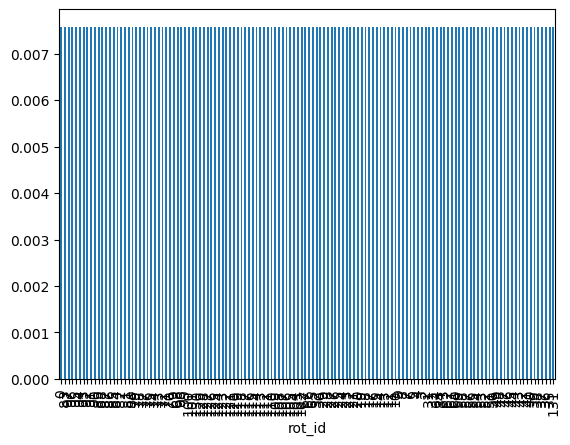

In [23]:
train_df['rot_id'].value_counts(normalize=True).plot.bar()

In [24]:
import copy
from itertools import product

def sample(df, samples_per_model=40):
  final_df = []
  uniq_rots = list(df['rot_id'].unique())
  models = df['model_id'].unique()
  to_sample = copy.deepcopy(uniq_rots)
  hist = {k: 0 for k in uniq_rots}
  for model in models:
    tmp = df[df['model_id']==model]
    if len(to_sample) >= samples_per_model:
      sampled = list(np.random.choice(to_sample, size=samples_per_model, replace=False))
      to_sample = list(np.setdiff1d(to_sample, sampled))
      if len(to_sample) == 0:
        to_sample = copy.deepcopy(uniq_rots)
    else:
      diff = samples_per_model - len(to_sample)
      sampled = list(copy.deepcopy(to_sample))
      to_sample = copy.deepcopy(uniq_rots)
      second_sample = list(np.random.choice(np.setdiff1d(to_sample, sampled), size=diff, replace=False))
      sampled += second_sample
      to_sample = list(np.setdiff1d(to_sample, second_sample))
    final_df.append(tmp[tmp['rot_id'].isin(sampled)])
  return pd.concat(final_df).reset_index(drop=True)

In [25]:
sampled_df = sample(train_df)

<Axes: xlabel='rot_id'>

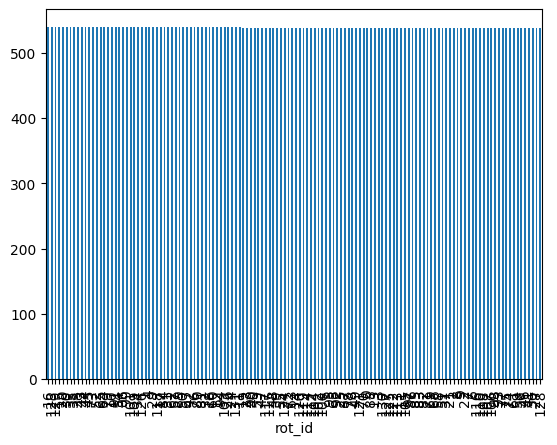

In [26]:
sampled_df['rot_id'].value_counts().plot.bar()

## Models

In [27]:
import sys
sys.path.append('./content/drive/MyDrive/ML4CV_poject/utils')

In [28]:
sys.path

['C:\\Python311\\python311.zip',
 'C:\\Python311\\DLLs',
 'C:\\Python311\\Lib',
 'C:\\Python311',
 'd:\\Jacopo Meglioraldi\\Camtrolnet\\camtrolnet',
 '',
 'd:\\Jacopo Meglioraldi\\Camtrolnet\\camtrolnet\\Lib\\site-packages',
 'd:\\Jacopo Meglioraldi\\Camtrolnet\\camtrolnet\\Lib\\site-packages\\win32',
 'd:\\Jacopo Meglioraldi\\Camtrolnet\\camtrolnet\\Lib\\site-packages\\win32\\lib',
 'd:\\Jacopo Meglioraldi\\Camtrolnet\\camtrolnet\\Lib\\site-packages\\Pythonwin',
 './content/drive/MyDrive/ML4CV_poject/utils']

In [29]:
import camtrolnet
from importlib import reload
reload(camtrolnet)
from camtrolnet import CamtrolNetModel
import camtrolnet_decoder
reload(camtrolnet_decoder)
from camtrolnet_decoder import CamtrolNetDecoderModel

In [30]:
#models from controlnet_train.py official

import diffusers
from diffusers import (
    AutoencoderKL,
    ControlNetModel,
    DDPMScheduler,
    StableDiffusionControlNetPipeline,
    UNet2DConditionModel,
    UniPCMultistepScheduler,
)
from diffusers.utils import load_image
from transformers import CLIPTextModel
import torch

#channels
channels = 3
latent_channels = 4 #default

# base model
pretrained_model_name_or_path = "pt-sk/stable-diffusion-1.5" #"runwayml/stable-diffusion-v1-5"
revision = None #'non-ema'
variant = None

# import correct text encoder class
text_encoder_cls = CLIPTextModel

# Load scheduler and models
noise_scheduler = DDPMScheduler.from_pretrained(pretrained_model_name_or_path, subfolder="scheduler")
text_encoder = text_encoder_cls.from_pretrained(
    pretrained_model_name_or_path, subfolder="text_encoder", revision=revision, variant=variant
)
vae = AutoencoderKL.from_pretrained(
    pretrained_model_name_or_path, subfolder="vae", revision=revision, variant=variant, in_channels=channels,
    low_cpu_mem_usage=False, ignore_mismatched_sizes=True
)
unet = UNet2DConditionModel.from_pretrained(
    pretrained_model_name_or_path, subfolder="unet", revision=revision, variant=variant, in_channels=latent_channels,
)

#controlnet = ControlNetModel.from_unet(unet, conditioning_channels=3)
#controlnet = CamtrolNetModel.from_unet(unet, conditioning_channels=3)
#controlnet = ControlNetModel.from_unet(unet, conditioning_channels=3+3)
controlnet = CamtrolNetDecoderModel.from_unet(unet, conditioning_channels=3)

## Saving Controlnet and Encoder Functions

In [31]:
def save_controlnet(controlnet, name="controlnet_v1", to_drive = False):
  if to_drive:
    model_drive_path = os.path.join(os.path.split(os.path.split(drive_path)[0])[0], "models")
    controlnet.save_pretrained(os.path.join(model_drive_path, str(name) ))
  else:
    controlnet.save_pretrained("./content/model/"+str(name))

def load_controlnet(controlnet, name="controlnet_v1", from_drive = False):
  if from_drive:
    model_drive_path = os.path.join(os.path.split(os.path.split(drive_path)[0])[0], "models")
    controlnet = controlnet.from_pretrained(os.path.join(model_drive_path, str(name) ))
  else:
    controlnet = controlnet.from_pretrained("./content/model/"+str(name))
  controlnet.train()
  return controlnet

In [32]:
def save_camera_encoder(encoder, name="encoder_v1", to_drive = False):
  if to_drive:
    model_drive_path = os.path.join(os.path.split(os.path.split(drive_path)[0])[0], "models")
    torch.save(encoder.state_dict(), os.path.join(model_drive_path, str(name)+".pth" ))
  else:
    torch.save(encoder.state_dict(), "/content/model/"+str(name)+".pth")

def load_camera_encoder(encoder, name="encoder_v1", from_drive = False):
  if from_drive:
    model_drive_path = os.path.join(os.path.split(os.path.split(drive_path)[0])[0], "models")
    encoder.load_state_dict(torch.load(os.path.join(model_drive_path, str(name)+".pth" )))
  else:
    encoder.load_state_dict(torch.load("/content/model/"+str(name)+".pth"))

In [ ]:
#save_controlnet(controlnet, to_drive = True)
#load_controlnet(controlnet, from_drive=True)
#save_camera_encoder(camera_encoder, to_drive = True)
#load_camera_encoder(camera_encoder, from_drive=True)

## Camera Position encoder (Convolution)[SKIP]

I barely know if this is correct, but it's an honest try I guess

In [33]:
from torch.nn import Flatten, Linear, Conv2d, ReLU, ConvTranspose2d, ModuleList, SiLU

In [57]:
class TransposeCameraEncoder(torch.nn.Module):

  def __init__(self, target_res=512, out_channels=3, max_hidden_channels=64):
    super(TransposeCameraEncoder, self).__init__()
    self.flat = Flatten()
    self.lin1 = Linear(3, 16)
    self.target_res = target_res
    self.out_channels = out_channels
    necessary_layers = 0.5*np.log2(target_res) # Basically log in base 4
    self.transposed_convs = ModuleList()
    if not necessary_layers.is_integer():
      # Se il log in base 4 non è intero significa che il risultato finale è una potenza di 2 ma non di 4
      # Quindi aggiungiamo una Tconv che raddoppia le dimensioni
      # In questo modo siamo sicuri che partendo da 8x8 invece che da 4x4 ci rientriamo
      self.transposed_convs.append(ConvTranspose2d(1, 1, 2, stride=2))
    pow4 = 1-int(necessary_layers.is_integer()) # Don't question my methods
    for i in range(int(necessary_layers)-1):
      in_ch = 4**(i+pow4) if 4**(i+pow4) <= max_hidden_channels else max_hidden_channels
      # Not a typo! in_ch = out_ch by design
      self.transposed_convs.append(ConvTranspose2d(in_ch, in_ch, 4, stride=4))

    self.convs = ModuleList()
    for i, _ in enumerate(self.transposed_convs):
      in_ch = 4**(i) if 4**(i) <= max_hidden_channels else max_hidden_channels
      out_ch = 4**(i+1) if 4**(i+1) <= max_hidden_channels else max_hidden_channels
      self.convs.append(Conv2d(in_ch, out_ch, kernel_size=3, padding=1))
    self.out = Conv2d(4**(len(self.convs)) if 4**(len(self.convs)) <= max_hidden_channels else max_hidden_channels, self.out_channels, 1)

  # change relu to silu

  def forward(self, x):
    x = self.lin1(x)
    x = SiLU()(x)
    bsz = x.shape[0]
    x = x.view((bsz, 1, 4, 4))
    for i in range(len(self.transposed_convs)):
      x = self.transposed_convs[i](x)
      x = SiLU()(x)
      x = self.convs[i](x)
      x = SiLU()(x)
    x = self.out(x)
    return x

In [58]:
camera_encoder = TransposeCameraEncoder(target_res = 64, max_hidden_channels=320, out_channels = 320)

In [59]:
camera_encoder

TransposeCameraEncoder(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (lin1): Linear(in_features=3, out_features=16, bias=True)
  (transposed_convs): ModuleList(
    (0): ConvTranspose2d(1, 1, kernel_size=(4, 4), stride=(4, 4))
    (1): ConvTranspose2d(4, 4, kernel_size=(4, 4), stride=(4, 4))
  )
  (convs): ModuleList(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (out): Conv2d(16, 320, kernel_size=(1, 1), stride=(1, 1))
)

In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary
summary(camera_encoder, (1, 1, 3, 4), device = "cpu")

In [ ]:
tester = torch.rand((2, 1, 3, 4))
tester

In [ ]:
camera_encoder(tester).shape

## Camera Position Encoder (Concat)
Remember to edit the training loop

In [ ]:
def create_camera_encodings(shape, camera):
  #shape has to be dimension 2
  camera = camera.flatten(start_dim = -2, end_dim = -1).reshape(camera.shape[0],-1, 1, 1)
  if isinstance(camera, np.ndarray):
    camera = np.tile(camera,(1,1,shape[0],shape[1]))
  elif torch.is_tensor(test_camera):
    camera = camera.repeat((1,1,shape[0],shape[1]))
  return camera


In [ ]:
test_camera = np.array([[1,2,3],[1,2,3]])
test_camera = torch.Tensor(test_camera)
camera_encodings = create_camera_encodings((10,10),test_camera)
print(camera_encodings, camera_encodings.shape)

tensor([[[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

         [[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
          

### Test every step of the model [SKIP]

In [ ]:
# t = train_dataset[0][0].to(dtype=torch.float32)[:3, :, :]
# t.shape

t = torch.rand((1, 3, 512, 512)).to(device="cuda")

In [ ]:
_ = vae.to(device = 'cuda')

In [ ]:
with torch.no_grad():
  latents = vae.encode(t).latent_dist.sample()

In [ ]:
latents.shape

torch.Size([1, 4, 64, 64])

In [ ]:
#test with real image
image1, label, camera, image2 = train_dataset.__getitem__(50)
image1 = torch.reshape(image1, [1, 3, 512, 512]).to(device='cuda')
with torch.no_grad():
  latents = vae.encode(image1).latent_dist.sample()
latents = latents * vae.config.scaling_factor

In [ ]:
latents

tensor([[[[ 7.1804e-01,  6.5329e-01,  7.1316e-01,  ...,  7.1326e-01,
            6.4583e-01,  3.8900e-01],
          [ 6.8823e-01,  6.7550e-01,  8.8523e-01,  ...,  7.1512e-01,
            6.4847e-01,  4.5850e-01],
          [ 7.0859e-01,  6.9348e-01,  9.0233e-01,  ...,  8.5022e-01,
            6.9955e-01,  5.0097e-01],
          ...,
          [ 7.4030e-01,  7.2700e-01,  8.3506e-01,  ...,  7.9530e-01,
            7.0918e-01,  5.3130e-01],
          [ 6.3829e-01,  6.6191e-01,  7.3278e-01,  ...,  6.9572e-01,
            6.3594e-01,  3.1239e-01],
          [ 2.9147e-01,  3.5639e-01,  6.3047e-01,  ...,  4.8013e-01,
            3.1677e-01,  2.6689e-01]],

         [[-4.0295e-01, -4.9028e-01, -4.9127e-01,  ..., -5.0903e-01,
           -5.8251e-01, -3.1411e-01],
          [-5.7375e-01, -6.5484e-01, -6.4401e-01,  ..., -6.5686e-01,
           -7.6959e-01, -3.9399e-01],
          [-5.2545e-01, -6.6281e-01, -6.1796e-01,  ..., -6.3682e-01,
           -7.8149e-01, -4.5363e-01],
          ...,
     

In [ ]:
latents.shape

torch.Size([1, 4, 64, 64])

In [ ]:
camera

tensor([ 0.0000, -1.2310,  0.0000])

In [ ]:
with torch.no_grad():
  camera_latents = camera_encoder(camera.view((1, 1, 3, 4)))
camera_latents.shape

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
complete_latents = latents + camera_latents

RuntimeError: The size of tensor a (4) must match the size of tensor b (320) at non-singleton dimension 1

In [ ]:
camera_encodings = create_camera_encodings(tuple(image2.shape[1:]), camera[None,:])

In [ ]:
print(camera_encodings.shape)

torch.Size([1, 3, 512, 512])


In [ ]:
image2 = image2[None,:,:,:]

In [ ]:
cond_image_concat = torch.cat([image2,camera_encodings], axis = 1)
print(cond_image_concat.shape)

torch.Size([1, 6, 512, 512])


In [ ]:
text_encoder = text_encoder_cls.from_pretrained(
        pretrained_model_name_or_path, subfolder="text_encoder", revision=revision, variant=variant
    )

In [ ]:
# purtroppo l'immagine 50 non ha label, quindi mi sono spostato alla 51 :(

timage, tlabel, tcamera, timage2 = train_dataset[51]
tlabel

tensor([49406, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407])

In [ ]:
text_encoder.to(device='cuda')

CLIPTextModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e

In [ ]:
tlabel=tlabel.to(device='cuda')


In [ ]:
a = torch.reshape(tlabel, (1, 77))

In [ ]:
with torch.no_grad():
  encoded_text = text_encoder(a, return_dict=False)[0]
encoded_text

tensor([[[-0.3884,  0.0229, -0.0522,  ..., -0.4899, -0.3066,  0.0675],
         [-0.3711, -1.4497, -0.3401,  ...,  0.9489,  0.1867, -1.1034],
         [-0.5107, -1.4629, -0.2926,  ...,  1.0419,  0.0701, -1.0284],
         ...,
         [ 0.5006, -0.9552, -0.6610,  ...,  1.6013, -1.0622, -0.2191],
         [ 0.4988, -0.9451, -0.6656,  ...,  1.6467, -1.0858, -0.2088],
         [ 0.4923, -0.8124, -0.4912,  ...,  1.6108, -1.0174, -0.2484]]],
       device='cuda:0')

In [ ]:
latents = latents.to(device='cuda')

In [ ]:
# La prima assume batch size=1 per semplicità, chiaramente cambieremo

timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (1,), device=latents.device)
timesteps = timesteps.long()

In [ ]:
timesteps

tensor([545], device='cuda:0')

In [ ]:
noise = torch.randn_like(latents)
noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

In [ ]:
controlnet.to(device='cuda')

ControlNetModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (controlnet_cond_embedding): ControlNetConditioningEmbedding(
    (conv_in): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (blocks): ModuleList(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): Conv2d(32, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (4): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): Conv2d(96, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (conv_out): Conv2d(256, 320, ker

In [ ]:
camera_latents = camera_latents.to(device="cuda")

NameError: name 'camera_latents' is not defined

In [ ]:
with torch.no_grad():
  down_block_res_samples, mid_block_res_sample = controlnet(
                                                            noisy_latents,
                                                            timesteps,
                                                            encoder_hidden_states=encoded_text,
                                                            controlnet_cond=cond_img,
                                                            camera_cond = camera_latents,
                                                            return_dict=False,
                                                        )

NameError: name 'cond_img' is not defined

In [ ]:
# Qualcosa mi dice che non va bene...

mid_block_res_sample

NameError: name 'mid_block_res_sample' is not defined

In [ ]:
cond_image_concat = torch.reshape(cond_image_concat, (1, 6, 512, 512))
cond_image_concat = cond_image_concat.to(device='cuda')

In [ ]:
with torch.no_grad():
  down_block_res_samples, mid_block_res_sample = controlnet(
                                                            noisy_latents,
                                                            timesteps,
                                                            encoder_hidden_states=encoded_text,
                                                            controlnet_cond=cond_image_concat,
                                                            return_dict=False,
                                                        )

In [ ]:
unet.to(device='cuda')

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

In [ ]:
pred = unet(noisy_latents,
            timesteps,
            encoder_hidden_states=encoded_text,
            down_block_additional_residuals=[sample.to(dtype=torch.float16) for sample in down_block_res_samples],
            mid_block_additional_residual=mid_block_res_sample.to(dtype=torch.float16),
            return_dict=False)

In [ ]:
pred

(tensor([[[[-0.4727,  0.4337,  0.3804,  ..., -1.1792,  1.3769,  1.5411],
           [-1.1150,  0.1143,  0.1888,  ...,  1.2751, -1.3884,  0.1442],
           [-0.6247,  0.1494, -0.3366,  ...,  1.2552, -0.0804,  0.1006],
           ...,
           [-0.5890,  0.4151, -0.2000,  ...,  0.7666, -1.4163,  0.7214],
           [ 1.4473, -0.1080,  0.2006,  ..., -0.1463,  0.2942, -1.3129],
           [ 0.0534, -0.4436, -0.2972,  ...,  1.0643, -0.1295,  0.6308]],
 
          [[ 2.0255, -1.1916,  1.4817,  ..., -0.9396, -1.1240,  0.0328],
           [-0.2510, -1.3066, -0.3395,  ..., -1.3815,  2.2296,  0.7150],
           [ 0.9039,  1.0809,  0.0897,  ..., -0.3348, -0.4249,  0.1324],
           ...,
           [ 1.3649, -0.6822,  1.6600,  ..., -0.1733,  0.5704,  1.8294],
           [-0.8335,  0.6325,  0.8599,  ..., -1.6738, -1.4693, -0.8938],
           [-0.0529,  1.3090, -0.2007,  ...,  1.5752, -0.8368,  0.2985]],
 
          [[-0.4356, -0.0522, -0.8951,  ...,  0.7452, -0.1768, -1.8375],
           [ 

In [ ]:
#free memory of testing
if "t" in globals(): del t
if "image1" in globals(): del image1
if "camera_latents" in globals(): del camera_latents
if "tlabel" in globals(): del tlabel
if "latents" in globals(): del latents
if "cond_img" in globals(): del cond_img
if "cond_image_concat" in globals(): del cond_image_concat

In [95]:
image_i, label_i, camera_i, target_image_i = train_dataset[0]
print(label_i.dtype)

torch.int64


In [41]:
with torch.no_grad():
    test_camera = torch.Tensor([[0,0,0],[0,0,0]]).to(device="cuda")
    cond_image = torch.randn((2,3,512,512)).to(device="cuda")
    texts = (torch.randn((2,77))+100).to(dtype=torch.int64).to(device="cuda")
    latents = vae.encode(cond_image).latent_dist.sample()
    latents = latents * vae.config.scaling_factor

    # sample noise and add it to the latents

    noise = torch.randn_like(latents)
    bsz = latents.shape[0]
    timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (bsz,), device=latents.device)
    timesteps = timesteps.long()
    noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

    # create text embeddings with the text encoder
    encoder_hidden_states = text_encoder(texts, return_dict=False)[0]
    down_block_res_samples, mid_block_res_sample = controlnet(
            latents,
            timesteps,
            encoder_hidden_states=encoder_hidden_states,
            controlnet_cond=cond_image,
            camera_cond = test_camera,
            return_dict=False,
        )
    print(down_block_res_samples.shape, mid_block_res_sample.shape)

d:\Jacopo Meglioraldi\Camtrolnet\camtrolnet\Lib\site-packages\diffusers\models\attention_processor.py:2367: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(


AttributeError: 'list' object has no attribute 'shape'

## Training loop

In [33]:
def collate_fn(ex):
  batch = {}
  dict_keys = ['input_imgs', 'texts', 'camera', 'rotated_imgs']
  for i, k in enumerate(dict_keys):
    batch[k] = torch.stack(list(torch.Tensor(ex[j][i]) for j in range(len(ex))))

  return batch

In [ ]:
# overfit_train = df[df['model_id'].str.contains('|'.join([test_models[0], test_models[1]]))]

In [ ]:
# train_dataset = CustomImageDataset(train_df, transform = image_transforms, target_transform = conditioning_image_transforms, channels=channels)
# val_dataset = CustomImageDataset(val_df, transform = image_transforms, target_transform = conditioning_image_transforms, channels=channels, delete_prob=.0)
# test_dataset = CustomImageDataset(test_df, transform = image_transforms, target_transform = conditioning_image_transforms, channels=channels, delete_prob=.0)

In [34]:
test_df['rot_id'] = test_df.apply(lambda x: rots[(int(x['image_id']), int(x['image_id2']))], axis=1)
test_sampled_df = sample(test_df)
val_df['rot_id'] = val_df.apply(lambda x: rots[(int(x['image_id']), int(x['image_id2']))], axis=1)
val_sampled_df = sample(val_df)


train_dataset = CustomImageDataset(sampled_df, target_transform = image_transforms, transform = conditioning_image_transforms, channels=channels)
val_dataset = CustomImageDataset(val_sampled_df, target_transform = image_transforms, transform = conditioning_image_transforms, channels=channels, delete_prob=.0)
test_dataset = CustomImageDataset(test_sampled_df, target_transform = image_transforms, transform = conditioning_image_transforms, channels=channels, delete_prob=.0)
# train_dataset = CustomImageDataset(sampled_df, transform = image_transforms, target_transform = conditioning_image_transforms, channels=channels)
# val_dataset = CustomImageDataset(val_df, transform = image_transforms, target_transform = conditioning_image_transforms, channels=channels, delete_prob=.0)
# test_dataset = CustomImageDataset(test_df, transform = image_transforms, target_transform = conditioning_image_transforms, channels=channels, delete_prob=.0)

In [35]:
BATCH_SIZE = 4

train_dl = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_dl = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_dl = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [45]:
#LOAD BACK PREVIOUS CONTROLNET
controlnet = load_controlnet(controlnet, "controlnet_decoder_1e", True)

In [46]:
controlnet

CamtrolNetDecoderModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (controlnet_cond_embedding): ControlNetConditioningEmbedding(
    (conv_in): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (blocks): ModuleList(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): Conv2d(32, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (4): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): Conv2d(96, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (conv_out): Conv2d(256, 3

In [47]:
print(f"Blocks on gpu? VAE {vae.device}, CLIP {text_encoder.device}, CONTROLNET {controlnet.device}, UNET {unet.device}")

Blocks on gpu? VAE cuda:0, CLIP cuda:0, CONTROLNET cpu, UNET cuda:0


In [48]:
#move all to gpu
_ = vae.to(device = "cuda")
_ = text_encoder.to(device = "cuda")
_ = controlnet.to(device = "cuda")
_ = unet.to(device = "cuda")
#_ = camera_encoder.to(device = "cuda")

In [49]:
#require grad false
_ = vae.requires_grad_(False)
_ = unet.requires_grad_(False)
_ = text_encoder.requires_grad_(False)

In [50]:
#***** SKIP ******
torch.cuda.empty_cache()
t = torch.cuda.get_device_properties(0).total_memory//1000000
r = torch.cuda.memory_reserved(0)//1000000
a = torch.cuda.memory_allocated(0)//1000000
print(f"CUDA MEMORY: total {t} Mib, reserved {r} Mib, allocated {a} Mib")
#print(torch.cuda.memory_summary())

#******IF STILL KEEP MEMORY, NEED TO RELOAD DF(ONLY THE SMALL ONE)
#******AND REBULD DATFRAME AND DATALOADER***********

CUDA MEMORY: total 25769 Mib, reserved 8124 Mib, allocated 7944 Mib


In [93]:
#***** SKIP ******
#free memory
_ = vae.to(device = "cpu")
_ = text_encoder.to(device = "cpu")
_ = controlnet.to(device = "cpu")
_ = unet.to(device = "cpu")
#_ = camera_encoder.to(device = "cpu")
if "latents" in globals(): del latents
if "in_imgs" in globals(): del in_imgs
if "noise" in globals(): del noise
if "bsz" in globals(): del bsz
if "timesteps" in globals(): del timesteps
if "noisy_latents" in globals(): del noisy_latents
if "texts" in globals(): del texts
if "camera_latents" in globals(): del camera_latents
if "encoder_hidden_states" in globals(): del encoder_hidden_states
if "controlnet_image" in globals(): del controlnet_image
if "down_block_res_samples" in globals(): del down_block_res_samples
if "mid_block_res_sample" in globals(): del mid_block_res_sample
if "mid_block_additional_residual" in globals(): del mid_block_additional_residual

In [ ]:
#***** SKIP ******
#extra free memory
if "vae" in globals(): del vae
if "text_encoder" in globals(): del text_encoder
if "controlnet" in globals(): del controlnet
if "unet" in globals(): del unet
if "noise_scheduler" in globals(): del noise_scheduler
if "optimizer" in globals(): del optimizer
if "camera_encoder" in globals(): del camera_encoder

In [ ]:
#***** SKIP ******
#list of all the tensors running on gpu
import gc
for obj in gc.get_objects():
    try:
        if (torch.is_tensor(obj) and obj.is_cuda) or (hasattr(obj, 'data') and torch.is_tensor(obj.data) and obj.data.is_cuda):
            print(type(obj), obj.size(), obj.get_device())
            del obj
    except:
        pass
gc.collect()

In [51]:
#check if model is in evaluation or train
print(f"is model in training mode? VAE {vae.training}, CLIP {text_encoder.training}, UNET {unet.training}, CONTROL {controlnet.training}")
#print(f"camera_encoder {camera_encoder.training}")

is model in training mode? VAE False, CLIP False, UNET False, CONTROL True


In [52]:
#enable xformers (should save memory)
vae.enable_xformers_memory_efficient_attention()
unet.enable_xformers_memory_efficient_attention()

In [53]:
import torch.nn.functional as F
from accelerate import Accelerator
from diffusers.optimization import get_scheduler
from tqdm import tqdm
from tqdm import trange

In [54]:
gradient_accumulation_steps = 4
mixed_precision = None

accelerator = Accelerator(gradient_accumulation_steps=gradient_accumulation_steps,
                          mixed_precision=mixed_precision,
                          log_with='wandb')

accelerator.init_trackers(
    project_name="StableDiffCameraCond",
    init_kwargs={"wandb": {"entity": "biasedturtle"}}
    )

In [55]:
optimizer_class = bnb.optim.AdamW8bit

learning_rate = 5e-6 * BATCH_SIZE * gradient_accumulation_steps
adam_beta1 = 0.9
adam_beta2 = 0.999
adam_weight_decay = 1e-2
adam_epsilon = 1e-08

#params_to_optimize = list(controlnet.parameters()) + list(camera_encoder.parameters())
params_to_optimize = controlnet.parameters()
optimizer = optimizer_class(
    params_to_optimize,
    lr=learning_rate,
    betas=(adam_beta1, adam_beta2),
    weight_decay=adam_weight_decay,
    eps=adam_epsilon,
)

try:
  optimizer.load_state_dict(torch.load('./content/drive/MyDrive/ML4CV_poject/optimizer.pth'))
except FileNotFoundError:
  print("Optimizer not found, starting from scratch")

In [56]:
lr_scheduler = 'constant'
lr_warmup_steps = 500
max_train_steps = 3
lr_num_cycles = 1
lr_power = 1.0

lr_scheduler = get_scheduler(
        lr_scheduler,
        optimizer=optimizer,
        num_warmup_steps=lr_warmup_steps * accelerator.num_processes,
        #num_training_steps=max_train_steps * accelerator.num_processes,
        #num_cycles=lr_num_cycles,
        power=lr_power,
    )

try:
  lr_scheduler.load_state_dict(torch.load('./content/drive/MyDrive/ML4CV_poject/lr_scheduler.pth'))
except FileNotFoundError:
  print("LR scheduler not found, starting from scratch")

In [57]:
# controlnet, camera_encoder, optimizer, train_dl, lr_scheduler = accelerator.prepare(
#         controlnet, camera_encoder, optimizer, train_dl, lr_scheduler
#     )
controlnet, optimizer, train_dl, lr_scheduler = accelerator.prepare(
        controlnet, optimizer, train_dl, lr_scheduler
    )

In [58]:
def run_epoch(dl: DataLoader,
              epoch_number: int,
              accelerator: Accelerator,
              controlnet: torch.nn.Module,
              vae: torch.nn.Module,
              text_encoder: torch.nn.Module,
              noise_scheduler: DDPMScheduler,
              save_prefix: str,
              save_after: int,
              train: bool=True):
  epoch_losses = []

  if train:
    controlnet.requires_grad_(True)
    controlnet.train()
  else:
    controlnet.requires_grad_(False)
    controlnet.eval()

  with tqdm(dl, unit="batch") as tepoch:
    for b_idx, batch in enumerate(tepoch):
      tepoch.set_description(f"Epoch {epoch_number+1} {'(validation)' if not train else ''}")
      with accelerator.accumulate(controlnet):

        # load input image, camera matrix and target image

        in_imgs = batch["input_imgs"].to(device='cuda')
        camera = batch['camera'].to(device='cuda')
        rot_img = batch['rotated_imgs'].to(device='cuda')

        # create latents

        latents = vae.encode(rot_img).latent_dist.sample()
        latents = latents * vae.config.scaling_factor

        # sample noise and add it to the latents

        noise = torch.randn_like(latents)
        bsz = latents.shape[0]
        timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (bsz,), device=latents.device)
        timesteps = timesteps.long()
        noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

        # create text embeddings with the text encoder

        texts = batch['texts'].to(device='cuda')
        encoder_hidden_states = text_encoder(texts, return_dict=False)[0]

        # create camera "embeddings" and concatenate with images

        #camera_encodings = create_camera_encodings(in_imgs.shape[-2:],camera)
        #cond_in_imgs = torch.cat([in_imgs,camera_encodings], axis = 1)
        #assert cond_in_imgs.size() == (BATCH_SIZE,6,512,512), "SHAPE ERROR! camera {}, camera_encodings {}, in_imgs {}, cond_in_imgs {}".format(camera.size(),camera_encodings.size(),in_imgs.size(),cond_in_imgs.size())

        # run controlnet

        down_block_res_samples, mid_block_res_sample = controlnet(
            noisy_latents,
            timesteps,
            encoder_hidden_states=encoder_hidden_states,
            controlnet_cond=in_imgs,
            camera_cond = camera,
            return_dict=False,
        )

        # run unet

        model_pred = unet(
          noisy_latents,
          timesteps,
          encoder_hidden_states=encoder_hidden_states,
          down_block_additional_residuals=[
              sample.to(dtype=torch.float32) for sample in down_block_res_samples
          ],
          mid_block_additional_residual=mid_block_res_sample.to(dtype=torch.float32),
          return_dict=False,
        )[0]

        # compute target noise and loss

        if noise_scheduler.config.prediction_type == "epsilon":
            target = noise
        elif noise_scheduler.config.prediction_type == "v_prediction":
            target = noise_scheduler.get_velocity(latents, noise, timesteps)
        else:
            raise ValueError(f"Unknown prediction type {noise_scheduler.config.prediction_type}")
        loss = F.mse_loss(model_pred.float(), target.float(), reduction="mean")

        # bacward pass. This will be run only if we are in train mode

        if train:
          accelerator.backward(loss)
          if accelerator.sync_gradients:
              params_to_clip = controlnet.parameters()
              accelerator.clip_grad_norm_(params_to_clip, 1.0)
          optimizer.step()
          lr_scheduler.step()
          optimizer.zero_grad(set_to_none=True)

        # update stats and progress bar

        epoch_losses.append(loss.detach().item())
        tepoch.set_postfix(loss=np.array(epoch_losses).mean())

        # Save model if in train mode

        if train and (b_idx+1)%save_after == 0:
          print(f' Saving after batch {b_idx+1}')
          save_controlnet(controlnet, name = f'{save_prefix}{str(epoch_number+1)}e', to_drive = True)
          torch.save(optimizer.state_dict(), './content/drive/MyDrive/ML4CV_poject/optimizer.pth')
          torch.save(lr_scheduler.state_dict(), './content/drive/MyDrive/ML4CV_poject/lr_scheduler.pth')
    to_log = 'training_loss' if train else 'validation_loss'
    accelerator.log({to_log: np.array(epoch_losses).mean()}, step=epoch_number)

In [59]:
def train_loop(train_dl: DataLoader,
               val_dl: DataLoader,
               epochs: int,
               accelerator: Accelerator,
               controlnet: torch.nn.Module,
               vae: torch.nn.Module,
               text_encoder: torch.nn.Module,
               noise_scheduler: DDPMScheduler,
               validate_after: int=10,
               save_after: int=1000,
               save_prefix: str='controlnet_decoder_',
               epoch_offset: int=0):
  for epoch in range(epochs):
    run_epoch(train_dl, epoch, accelerator, controlnet, vae, text_encoder, noise_scheduler, save_prefix, save_after, train=True)
    if (epoch + 1) % validate_after == 0:
      run_epoch(val_dl, epoch, accelerator, controlnet, vae, text_encoder, noise_scheduler, save_prefix, save_after, train=False)
    save_controlnet(controlnet, name = f'{save_prefix}{str(epoch+epoch_offset+1)}e', to_drive = True)
    torch.save(optimizer.state_dict(), './content/drive/MyDrive/ML4CV_poject/optimizer.pth')
    torch.save(lr_scheduler.state_dict(), './content/drive/MyDrive/ML4CV_poject/lr_scheduler.pth')

In [60]:
train_loop(train_dl, val_dl, 1, accelerator, controlnet, vae, text_encoder, noise_scheduler, validate_after=1, epoch_offset=1)

Epoch 1 :   0%|          | 0/17800 [00:00<?, ?batch/s]d:\Jacopo Meglioraldi\Camtrolnet\camtrolnet\Lib\site-packages\diffusers\models\attention_processor.py:2367: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(
Epoch 1 :   6%|▌         | 999/17800 [23:51<6:31:55,  1.40s/batch, loss=0.0189] 

 Saving after batch 1000


Epoch 1 :  11%|█         | 1999/17800 [47:12<6:01:33,  1.37s/batch, loss=0.0194] 

 Saving after batch 2000


Epoch 1 :  17%|█▋        | 2999/17800 [1:10:14<5:45:01,  1.40s/batch, loss=0.0193]

 Saving after batch 3000


Epoch 1 :  22%|██▏       | 3999/17800 [1:32:57<5:09:36,  1.35s/batch, loss=0.0194] 

 Saving after batch 4000


Epoch 1 :  28%|██▊       | 4999/17800 [1:55:29<4:42:49,  1.33s/batch, loss=0.0194] 

 Saving after batch 5000


Epoch 1 :  34%|███▎      | 5999/17800 [2:17:53<4:20:19,  1.32s/batch, loss=0.0195] 

 Saving after batch 6000


Epoch 1 :  39%|███▉      | 6999/17800 [2:40:13<3:57:30,  1.32s/batch, loss=0.0194] 

 Saving after batch 7000


Epoch 1 :  45%|████▍     | 7999/17800 [3:02:30<3:36:52,  1.33s/batch, loss=0.0194] 

 Saving after batch 8000


Epoch 1 :  51%|█████     | 8999/17800 [3:24:44<3:12:51,  1.31s/batch, loss=0.0194] 

 Saving after batch 9000


Epoch 1 :  56%|█████▌    | 9999/17800 [3:46:56<2:51:31,  1.32s/batch, loss=0.0194]

 Saving after batch 10000


Epoch 1 :  62%|██████▏   | 10999/17800 [4:09:08<2:28:48,  1.31s/batch, loss=0.0194]

 Saving after batch 11000


Epoch 1 :  67%|██████▋   | 11999/17800 [4:31:19<2:06:54,  1.31s/batch, loss=0.0195]

 Saving after batch 12000


Epoch 1 :  73%|███████▎  | 12999/17800 [4:53:29<1:44:43,  1.31s/batch, loss=0.0194]

 Saving after batch 13000


Epoch 1 :  79%|███████▊  | 13999/17800 [5:15:35<1:23:07,  1.31s/batch, loss=0.0195]

 Saving after batch 14000


Epoch 1 :  84%|████████▍ | 14999/17800 [5:37:42<1:01:22,  1.31s/batch, loss=0.0194]

 Saving after batch 15000


Epoch 1 :  90%|████████▉ | 15999/17800 [5:59:48<39:25,  1.31s/batch, loss=0.0194]  

 Saving after batch 16000


Epoch 1 :  96%|█████████▌| 16999/17800 [6:21:57<17:34,  1.32s/batch, loss=0.0194]  

 Saving after batch 17000


Epoch 1 (validation): 100%|██████████| 4450/4450 [47:18<00:00,  1.57batch/s, loss=0.0211]


In [ ]:
for epoch in range(4):
  epoch_losses = []
  with tqdm(train_dl, unit="batch") as tepoch:
    for batch in tepoch:
      tepoch.set_description(f"Epoch {epoch+1}")
      with accelerator.accumulate(controlnet):
        in_imgs = batch["input_imgs"].to(device='cuda')
        camera = batch['camera'].to(device='cuda')
        rot_img = batch['rotated_imgs'].to(device='cuda')
        latents = vae.encode(rot_img).latent_dist.sample()
        latents = latents * vae.config.scaling_factor


        noise = torch.randn_like(latents)
        bsz = latents.shape[0]
        timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (bsz,), device=latents.device)
        timesteps = timesteps.long()
        noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

        # Get the text embedding for conditioning
        texts = batch['texts'].to(device='cuda')
        encoder_hidden_states = text_encoder(texts, return_dict=False)[0]

        #camera_latents = camera_encoder(camera)
        camera_encodings = create_camera_encodings(in_imgs.shape[-2:],camera)
        cond_in_imgs = torch.cat([in_imgs,camera_encodings], axis = 1)
        assert cond_in_imgs.size() == (BATCH_SIZE,6,512,512), "SHAPE ERROR! camera {}, camera_encodings {}, in_imgs {}, cond_in_imgs {}".format(camera.size(),camera_encodings.size(),in_imgs.size(),cond_in_imgs.size())

        # down_block_res_samples, mid_block_res_sample = controlnet(
        #     noisy_latents,
        #     timesteps,
        #     encoder_hidden_states=encoder_hidden_states,
        #     controlnet_cond=in_imgs,
        #     camera_cond = camera_latents,
        #     return_dict=False,
        # )
        down_block_res_samples, mid_block_res_sample = controlnet(
            noisy_latents,
            timesteps,
            encoder_hidden_states=encoder_hidden_states,
            controlnet_cond=cond_in_imgs,
            return_dict=False,
        )


        model_pred = unet(
          noisy_latents,
          timesteps,
          encoder_hidden_states=encoder_hidden_states,
          down_block_additional_residuals=[
              sample.to(dtype=torch.float32) for sample in down_block_res_samples
          ],
          mid_block_additional_residual=mid_block_res_sample.to(dtype=torch.float32),
          return_dict=False,
        )[0]

        if noise_scheduler.config.prediction_type == "epsilon":
            target = noise
        elif noise_scheduler.config.prediction_type == "v_prediction":
            target = noise_scheduler.get_velocity(latents, noise, timesteps)
        else:
            raise ValueError(f"Unknown prediction type {noise_scheduler.config.prediction_type}")
        loss = F.mse_loss(model_pred.float(), target.float(), reduction="mean")
        accelerator.backward(loss)
        if accelerator.sync_gradients:
            params_to_clip = controlnet.parameters()
            accelerator.clip_grad_norm_(params_to_clip, 1.0)
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad(set_to_none='store_true')
        epoch_losses.append(loss.detach().item())
        tepoch.set_postfix(loss=np.array(epoch_losses).mean())
    accelerator.log({"training_loss": np.array(epoch_losses).mean()}, step=epoch)
accelerator.end_training()

Epoch 1:   0%|          | 0/66 [00:00<?, ?batch/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Epoch 4: 100%|██████████| 66/66 [02:00<00:00,  1.82s/batch, loss=0.0195]


In [ ]:
#Save checkpoints in case
save_controlnet(controlnet, name = "controlnet_overfit_concat_40e", to_drive = True)
save_camera_encoder(camera_encoder, name = "camera_encoder_overfit_concat_40e", to_drive = True)

# Generate images

In [ ]:
#***** SKIP ******
torch.cuda.empty_cache()
t = torch.cuda.get_device_properties(0).total_memory//1000000
r = torch.cuda.memory_reserved(0)//1000000
a = torch.cuda.memory_allocated(0)//1000000
print(f"CUDA MEMORY: total {t} Mib, reserved {r} Mib, allocated {a} Mib")
#print(torch.cuda.memory_summary())

CUDA MEMORY: total 23802 Mib, reserved 18224 Mib, allocated 18036 Mib


In [ ]:
#FREE MEMORY (in case)
if "uncond_tokenized_prompt" in globals(): del uncond_tokenized_prompt
if "prompt_embeds" in globals(): del prompt_embeds
if "timesteps" in globals(): del timesteps
if "latents" in globals(): del latents
if "starting_latents" in globals(): del starting_latents
if "camera_embed" in globals(): del camera_embed
if "latent_model_input" in globals(): del latent_model_input
if "down_block_res_samples" in globals(): del down_block_res_samples
if "mid_block_res_sample" in globals(): del mid_block_res_sample
if "noise_pred" in globals(): del noise_pred
if "image" in globals(): del image
if "generator" in globals(): del generator

In [67]:
#UTILS plot images
def plot_images(cond, pred, target, no_control_image= None, title = None, **kwargs):
  if no_control_image:
    f, axarr = plt.subplots(1,4)
    axarr[0].imshow(cond.cpu().squeeze().permute(1,2,0), **kwargs)
    axarr[1].imshow(pred.cpu().squeeze().permute(1,2,0), **kwargs)
    axarr[2].imshow(no_control_image.cpu().squeeze().permute(1,2,0), **kwargs)
    axarr[3].imshow(target.cpu().squeeze().permute(1,2,0), **kwargs)
    axarr[3].axis('off')
  else:
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(cond.cpu().squeeze().permute(1,2,0), **kwargs)
    axarr[1].imshow(pred.cpu().squeeze().permute(1,2,0), **kwargs)
    axarr[2].imshow(target.cpu().squeeze().permute(1,2,0), **kwargs)
  axarr[0].axis('off')
  axarr[1].axis('off')
  axarr[2].axis('off')
  if title:
    axarr[1].set_title(title, fontsize = "small")
  plt.plot()

In [68]:
#assert that all the variables exists
assert "vae" in globals() or "vae" in locals(), "Missing Vae encoder!"
assert "text_encoder" in globals() or "text_encoder" in locals(), "Missing Text encoder"
assert "controlnet" in globals() or "controlnet" in locals(), "Missing Controlnet model!"
assert "unet" in globals() or "unet" in locals(), "Missing Unet model!"
#assert "camera_encoder" in globals() or "camera_encoder" in locals(), "Missing Camera encoder!"

In [75]:
#load back the models and set them to evaluate!
#loading back models
controlnet = load_controlnet(controlnet, name='controlnet_acc_sph_shift_1e', from_drive=True)
#load_camera_encoder(camera_encoder, name='camera_encoder_overfit_concat_40e', from_drive=True)

In [80]:
#move all to gpu
_ = vae.to(device = "cuda")
_ = text_encoder.to(device = "cuda")
_ = controlnet.to(device = "cuda")
_ = unet.to(device = "cuda")
#_ = camera_encoder.to(device = "cuda")

In [81]:
#set all to eval
_ = controlnet.eval()
#_ = camera_encoder.eval()

In [72]:
#check if model is in evaluation or train
print(f"is model in training mode? VAE {vae.training}, CLIP {text_encoder.training}, UNET {unet.training}, CONTROL {controlnet.training}")
#print(f"is model in training mode? VAE {vae.training}, CLIP {text_encoder.training}, UNET {unet.training}, CONTROL {controlnet.training}, CameraEnc {camera_encoder.training}")

is model in training mode? VAE False, CLIP False, UNET False, CONTROL False


In [73]:
from tqdm.notebook import tqdm
device = "cuda"

def generate_image(
    vae,
    text_encoder,
    noise_scheduler,
    unet,
    controlnet,
    #camera_encoder,
    tokenized_prompt,
    uncond_tokenized_prompt,
    cond_image,
    camera,
    timesteps,
    seed,
    guidance_scale = 7.5,
    use_controlnet = True,
    *args
):
    generator = torch.Generator(device=device)
    generator.manual_seed(seed)
    with torch.no_grad():
      uncond_tokenized_prompt = uncond_tokenized_prompt.to(device=device)
      prompt_embeds = text_encoder(tokenized_prompt.to(device), return_dict=False)[0]
      prompt_embeds = prompt_embeds.to(device = device)
      noise_scheduler.set_timesteps(timesteps, device=device)
      timesteps = noise_scheduler.timesteps
      num_inference_steps = len(timesteps)
      height, width = cond_image.shape[-2:]
      shape = (1, 4, 64, 64)
      latents = torch.randn(shape, generator=generator, device=device)
      latents = latents * noise_scheduler.init_noise_sigma #is the std of the gaussian. Set to be 1.0 for DDPM
      if guidance_scale>1:
        # Aggiunto questa riga perché altrimenti il cat dei prompt non funzionava poiché avevano shapes diverse...
        uncond_tokenized_prompt = text_encoder(uncond_tokenized_prompt.to(device), return_dict=False)[0]
        prompt_embeds = torch.cat([uncond_tokenized_prompt,prompt_embeds])
        cond_image = torch.cat([cond_image]*2)
        camera = torch.cat([camera]*2)
      # camera_embed = camera_encoder(camera)
      # camera_embed = camera_embed.to(device = device)
      # camera_encodings = create_camera_encodings(cond_image.shape[-2:],camera)
      # cond_image_concat = torch.cat([cond_image,camera_encodings], axis = 1)
      # cond_image_concat = cond_image_concat.to(device = device)
      # print(cond_image_concat.shape)

      #denoising loop
      num_warmup_steps = len(timesteps) - num_inference_steps * noise_scheduler.order
      with tqdm(total=num_inference_steps) as progress_bar:
        for i, t in enumerate(timesteps):
          if guidance_scale>1:
            latent_model_input = torch.cat([latents]*2)
          else:
            latent_model_input = latents
          latent_model_input = noise_scheduler.scale_model_input(latent_model_input, t)
          latent_model_input = latent_model_input.to(device=device)
          # down_block_res_samples, mid_block_res_sample = controlnet(
          #         latent_model_input,
          #         t,
          #         encoder_hidden_states=prompt_embeds,
          #         controlnet_cond=cond_image,
          #         camera_cond = camera_embed,
          #         return_dict=False,
          #     )
          if use_controlnet:
            down_block_res_samples, mid_block_res_sample = controlnet(
                    latent_model_input,
                    t,
                    encoder_hidden_states=prompt_embeds,
                    controlnet_cond=cond_image,
                    camera_cond = camera,
                    return_dict=False,
                )
            noise_pred = unet(
                    latent_model_input,
                    t,
                    encoder_hidden_states=prompt_embeds,
                    down_block_additional_residuals=down_block_res_samples,
                    mid_block_additional_residual=mid_block_res_sample,
                    return_dict=False,
                )[0]
          else:
            noise_pred = unet(
                    latent_model_input,
                    t,
                    encoder_hidden_states=prompt_embeds,
                    return_dict=False,
                )[0]
          if guidance_scale>1:
            noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
            noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)
          latents = noise_scheduler.step(noise_pred, t, latents, generator = generator, return_dict=False)[0]
          latents.to(device=device)
          progress_bar.update()
      image = vae.decode(latents / vae.config.scaling_factor, return_dict=False, generator=generator)[0]
      image = (image / 2 + 0.5).clamp(0, 1)
      #image = image.cpu().permute(2, 3, 1).float().numpy() #Not needed! already in rgb!
    return image

In [ ]:
len(test_dataset)

160

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

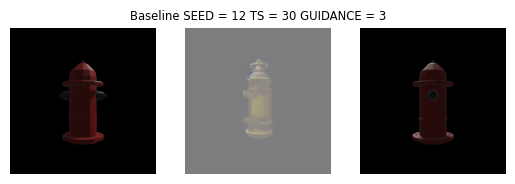

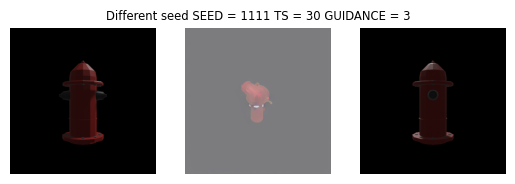

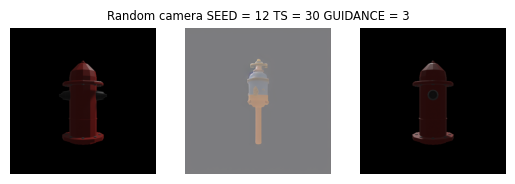

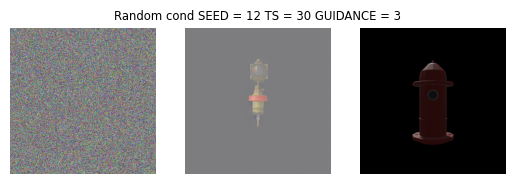

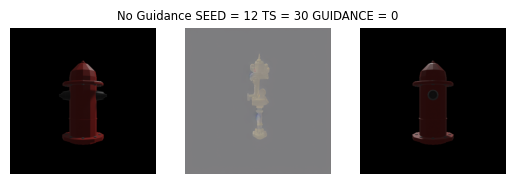

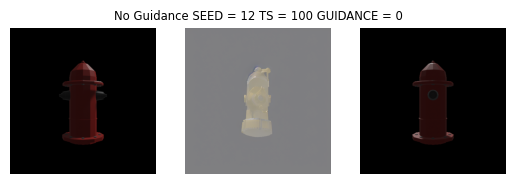

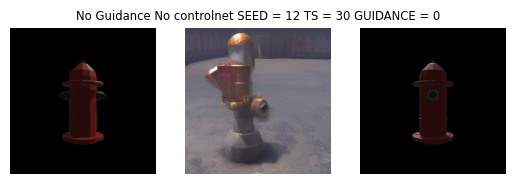

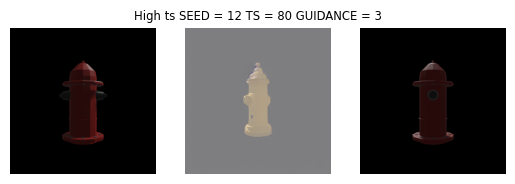

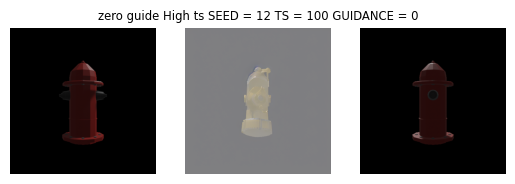

In [ ]:
#generate test
sample_id = 79 #<80
SEED = 12
TIMESTEPS = 30
GUIDANCE_SCALE = 3


cond_image, tokenized_prompt, camera, target_image = test_dataset[sample_id]
cond_image = cond_image.to(device='cuda')[None,:]
camera = camera.to(device='cuda')[None,:]
target_image = target_image.to(device='cuda')[None,:]
tokenized_prompt = tokenized_prompt.to(device='cuda')[None,:]
tokenizer = AutoTokenizer.from_pretrained(
            "pt-sk/stable-diffusion-1.5", #"runwayml/stable-diffusion-v1-5"
            subfolder="tokenizer",
            revision=None,
            use_fast=False,
        )
uncond_tokenized_prompt = tokenizer("", max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt").input_ids
uncond_tokenized_prompt.to(device='cuda')

#generate Baseline
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, TIMESTEPS, SEED, GUIDANCE_SCALE)
plot_images(cond_image, pred_image, target_image, title=f"Baseline SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {GUIDANCE_SCALE}")

#generate different seed
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, TIMESTEPS, 1111, GUIDANCE_SCALE)
plot_images(cond_image, pred_image, target_image, title=f"Different seed SEED = {1111} TS = {TIMESTEPS} GUIDANCE = {GUIDANCE_SCALE}")

#generate random camera
rand = torch.rand_like(camera).to("cuda")*6-3
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, rand, TIMESTEPS, SEED, GUIDANCE_SCALE)
plot_images(cond_image, pred_image, target_image, title=f"Random camera SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {GUIDANCE_SCALE}")

#generate random cond
rand = torch.rand_like(cond_image).to("cuda")
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, rand, camera, TIMESTEPS, SEED, GUIDANCE_SCALE)
plot_images(rand, pred_image, target_image, title=f"Random cond SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {GUIDANCE_SCALE}")

#generate zero guidance
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, TIMESTEPS, SEED, 0)
plot_images(cond_image, pred_image, target_image, title=f"No Guidance SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {0}")

#generate zero guidance high ts
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, 100, SEED, 0)
plot_images(cond_image, pred_image, target_image, title=f"No Guidance SEED = {SEED} TS = {100} GUIDANCE = {0}")

#generate zero guidance no control
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, TIMESTEPS, SEED, 0, use_controlnet= False)
plot_images(cond_image, pred_image, target_image, title=f"No Guidance No controlnet SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {0}")

#generate high timesteps
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, 80, SEED, GUIDANCE_SCALE)
plot_images(cond_image, pred_image, target_image, title=f"High ts SEED = {SEED} TS = {80} GUIDANCE = {GUIDANCE_SCALE}")

#generate zero_guide high ts
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, 100, SEED, 0)
plot_images(cond_image, pred_image, target_image, title=f"zero guide High ts SEED = {SEED} TS = {100} GUIDANCE = {0}")

#offload to cpu values
cond_image = cond_image.to(device="cpu")
camera = camera.to(device="cpu")
target_image = target_image.to(device="cpu")
tokenized_prompt = tokenized_prompt.to(device="cpu")

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

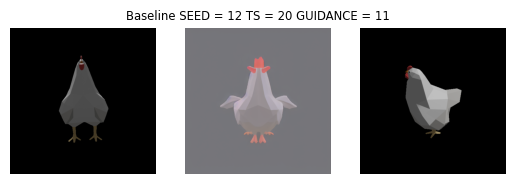

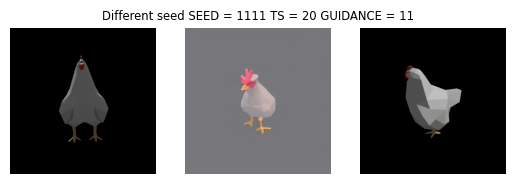

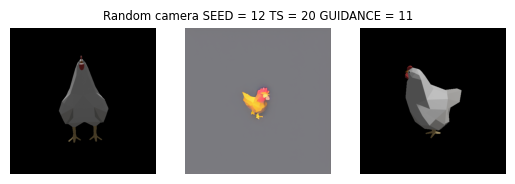

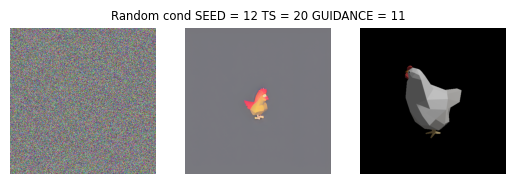

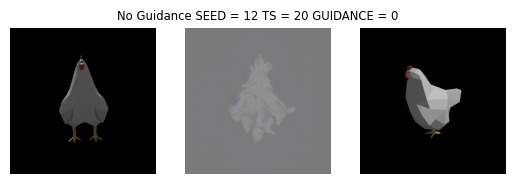

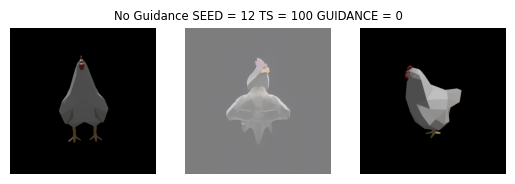

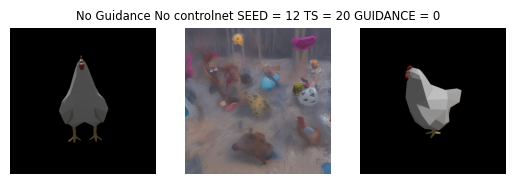

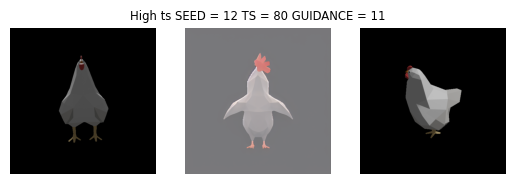

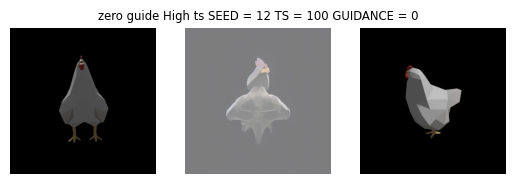

In [85]:
#generate test
sample_id = 34 #<80
SEED = 12
TIMESTEPS = 20
GUIDANCE_SCALE = 11


cond_image, tokenized_prompt, camera, target_image = test_dataset[sample_id]
cond_image = cond_image.to(device='cuda')[None,:]
camera = camera.to(device='cuda')[None,:]
target_image = ((target_image+1)/2).to(device='cuda')[None,:]
tokenized_prompt = tokenized_prompt.to(device='cuda')[None,:]
tokenizer = AutoTokenizer.from_pretrained(
            "pt-sk/stable-diffusion-1.5", #"runwayml/stable-diffusion-v1-5"
            subfolder="tokenizer",
            revision=None,
            use_fast=False,
        )
uncond_tokenized_prompt = tokenizer("", max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt").input_ids
uncond_tokenized_prompt.to(device='cuda')

#generate Baseline
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, TIMESTEPS, SEED, GUIDANCE_SCALE)
plot_images(cond_image, pred_image, target_image, title=f"Baseline SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {GUIDANCE_SCALE}")

#generate different seed
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, TIMESTEPS, 1111, GUIDANCE_SCALE)
plot_images(cond_image, pred_image, target_image, title=f"Different seed SEED = {1111} TS = {TIMESTEPS} GUIDANCE = {GUIDANCE_SCALE}")

#generate random camera
rand = torch.rand_like(camera).to("cuda")*6-3
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, rand, TIMESTEPS, SEED, GUIDANCE_SCALE)
plot_images(cond_image, pred_image, target_image, title=f"Random camera SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {GUIDANCE_SCALE}")

#generate random cond
rand = torch.rand_like(cond_image).to("cuda")
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, rand, camera, TIMESTEPS, SEED, GUIDANCE_SCALE)
plot_images(rand, pred_image, target_image, title=f"Random cond SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {GUIDANCE_SCALE}")

#generate zero guidance
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, TIMESTEPS, SEED, 0)
plot_images(cond_image, pred_image, target_image, title=f"No Guidance SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {0}")

#generate zero guidance high ts
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, 100, SEED, 0)
plot_images(cond_image, pred_image, target_image, title=f"No Guidance SEED = {SEED} TS = {100} GUIDANCE = {0}")

#generate zero guidance no control
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, TIMESTEPS, SEED, 0, use_controlnet= False)
plot_images(cond_image, pred_image, target_image, title=f"No Guidance No controlnet SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {0}")

#generate high timesteps
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, 80, SEED, GUIDANCE_SCALE)
plot_images(cond_image, pred_image, target_image, title=f"High ts SEED = {SEED} TS = {80} GUIDANCE = {GUIDANCE_SCALE}")

#generate zero_guide high ts
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, 100, SEED, 0)
plot_images(cond_image, pred_image, target_image, title=f"zero guide High ts SEED = {SEED} TS = {100} GUIDANCE = {0}")

#offload to cpu values
cond_image = cond_image.to(device="cpu")
camera = camera.to(device="cpu")
target_image = target_image.to(device="cpu")
tokenized_prompt = tokenized_prompt.to(device="cpu")

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

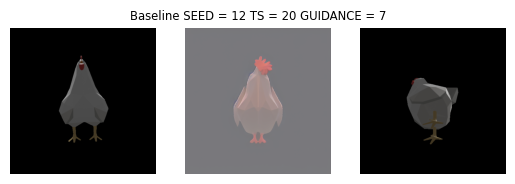

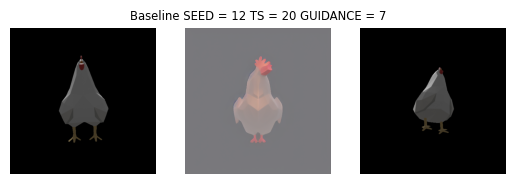

In [103]:
SEED = 12
sample_id = 37
cond_image, tokenized_prompt, camera, target_image = test_dataset[sample_id]
cond_image = cond_image.to(device='cuda')[None,:]
camera = camera.to(device='cuda')[None,:]
target_image = ((target_image+1)/2).to(device='cuda')[None,:]
tokenized_prompt = tokenized_prompt.to(device='cuda')[None,:]
tokenizer = AutoTokenizer.from_pretrained(
            "pt-sk/stable-diffusion-1.5", #"runwayml/stable-diffusion-v1-5"
            subfolder="tokenizer",
            revision=None,
            use_fast=False,
        )
uncond_tokenized_prompt = tokenizer("", max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt").input_ids
uncond_tokenized_prompt.to(device='cuda')

#generate Baseline
pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, TIMESTEPS, SEED, 7)
plot_images(cond_image, pred_image, target_image, title=f"Baseline SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {7}")

sample_id = 36
cond_image, tokenized_prompt, camera, target_image = test_dataset[sample_id]
cond_image = cond_image.to(device='cuda')[None,:]
camera = camera.to(device='cuda')[None,:]
target_image = ((target_image+1)/2).to(device='cuda')[None,:]
tokenized_prompt = tokenized_prompt.to(device='cuda')[None,:]
tokenizer = AutoTokenizer.from_pretrained(
            "pt-sk/stable-diffusion-1.5", #"runwayml/stable-diffusion-v1-5"
            subfolder="tokenizer",
            revision=None,
            use_fast=False,
        )
uncond_tokenized_prompt = tokenizer("", max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt").input_ids
uncond_tokenized_prompt.to(device='cuda')

pred_image = generate_image(vae, text_encoder, noise_scheduler, unet, controlnet, tokenized_prompt, uncond_tokenized_prompt, cond_image, camera, TIMESTEPS, SEED, 7)
plot_images(cond_image, pred_image, target_image, title=f"Baseline SEED = {SEED} TS = {TIMESTEPS} GUIDANCE = {7}")

### TEST save and load

In [42]:
camtrolnet_zero_initialized = CamtrolNetModel.from_unet(unet, conditioning_channels=3)

In [43]:
controlnet

CamtrolNetModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (controlnet_cond_embedding): ControlNetConditioningEmbedding(
    (conv_in): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (blocks): ModuleList(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): Conv2d(32, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (4): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): Conv2d(96, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (conv_out): Conv2d(256, 320, ker

In [54]:
controlnet.to("cpu")

CamtrolNetModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (controlnet_cond_embedding): ControlNetConditioningEmbedding(
    (conv_in): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (blocks): ModuleList(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): Conv2d(32, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (4): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): Conv2d(96, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (conv_out): Conv2d(256, 320, ker

Parameters : -0.3370562791824341 0.3686886727809906 0.05880940333008766


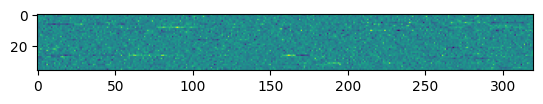

In [65]:
specific_module = [module for name, module in controlnet.named_modules() if name == "conv_in"][0]
parameters = list(specific_module.parameters())[0]
from matplotlib import pyplot as plt
print(f"Parameters : {parameters.min()} {parameters.max()} {parameters.std()}")
plt.imshow(parameters.view((-1,320)).detach())

Parameters : -0.34009575843811035 0.3862171173095703 0.05870193988084793


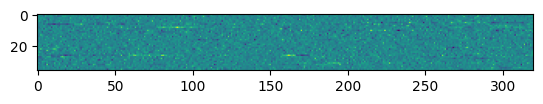

In [58]:
specific_module = [module for name, module in camtrolnet_zero_initialized.named_modules() if name == "conv_in"][0]
parameters = list(specific_module.parameters())[0]
from matplotlib import pyplot as plt
print(f"Parameters : {parameters.min()} {parameters.max()} {parameters.std()}")
plt.imshow(parameters.view((-1,320)).detach())

### TEST everything of the loop is ok

In [ ]:
batch = next(iter(train_dl))

In [ ]:
cond_image = batch["input_imgs"][0].to(device='cuda')[None,:]
camera = batch['camera'][0].to(device='cuda')[None,:]
target_image = batch['rotated_imgs'][0].to(device='cuda')[None,:]
tokenized_prompt = batch['texts'][0].to(device='cuda')[None,:]

In [ ]:
target_image

tensor([[[0.0000, 0.0039, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0039],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0039, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0039],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0039, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.

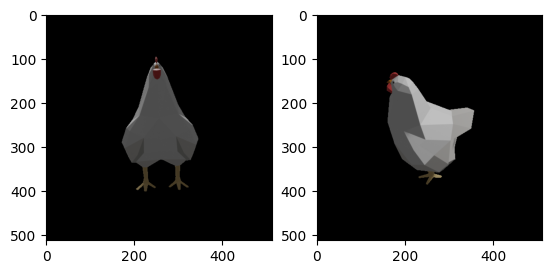

In [ ]:
plot_images(cond_image, target_image)

In [ ]:
text_encoder(tokenized_prompt[None,:], attention_mask = None, return_dict= False)

(tensor([[[-0.3884,  0.0229, -0.0522,  ..., -0.4899, -0.3066,  0.0675],
          [ 0.8511, -0.5896,  0.9544,  ..., -0.6533,  0.6332,  0.0719],
          [-1.0283,  1.1159,  0.5779,  ..., -0.8676, -0.9100,  0.8129],
          ...,
          [ 0.1782,  0.5440,  0.8598,  ...,  0.6385, -0.2484, -0.0639],
          [ 0.1675,  0.5403,  0.8832,  ...,  0.6285, -0.2368, -0.0552],
          [ 0.2285,  0.5589,  0.9154,  ...,  0.5462, -0.2110, -0.1172]]],
        device='cuda:0', grad_fn=<NativeLayerNormBackward0>),
 tensor([[ 3.2388e-01,  7.3608e-01,  8.1907e-01,  4.3601e-01, -2.7232e+00,
           5.0591e-01, -1.3198e+00,  1.9284e+00,  1.2081e+00, -1.6028e-01,
          -9.4273e-01,  8.4401e-01, -1.8576e-01,  8.0993e-01, -2.5517e-01,
           9.6256e-02,  6.1784e-01,  1.5724e+00,  1.7635e+00,  3.0291e+00,
           3.5519e-01, -6.3348e-01, -1.9192e+00, -2.3522e+00,  1.2672e+00,
           2.2991e-01, -1.1147e+00, -1.4649e+00, -1.6624e+00,  4.1248e-01,
          -1.4253e+00,  8.4083e-01, -5.

In [ ]:
cond_image.min()

tensor(0., device='cuda:0')

In [ ]:
pred_image.min()

tensor(-1.1707, device='cuda:0')

In [ ]:
generator = torch.manual_seed(SEED).to(device=device)
generator

AttributeError: 'torch._C.Generator' object has no attribute 'to'

In [ ]:
generator = torch.Generator(device=device)
generator.manual_seed(SEED)
print(SEED)

3785279


In [ ]:
for i in range(10):
  print(torch.randn((1, 2), device=device, generator=generator))

tensor([[-0.1203, -0.2804]], device='cuda:0')
tensor([[-1.6111, -0.7336]], device='cuda:0')
tensor([[-0.5470,  1.1741]], device='cuda:0')
tensor([[0.1007, 1.7760]], device='cuda:0')
tensor([[ 0.7681, -0.1351]], device='cuda:0')
tensor([[ 0.8871, -1.3796]], device='cuda:0')
tensor([[ 0.0314, -0.5985]], device='cuda:0')
tensor([[-0.4627, -0.4749]], device='cuda:0')
tensor([[ 0.2797, -0.0637]], device='cuda:0')
tensor([[0.3219, 0.7333]], device='cuda:0')


In [ ]:
for i in range(10):
  print(torch.randn((1, 2), device=device, generator=generator))

tensor([[-0.1203, -0.2804]], device='cuda:0')
tensor([[-1.6111, -0.7336]], device='cuda:0')
tensor([[-0.5470,  1.1741]], device='cuda:0')
tensor([[0.1007, 1.7760]], device='cuda:0')
tensor([[ 0.7681, -0.1351]], device='cuda:0')
tensor([[ 0.8871, -1.3796]], device='cuda:0')
tensor([[ 0.0314, -0.5985]], device='cuda:0')
tensor([[-0.4627, -0.4749]], device='cuda:0')
tensor([[ 0.2797, -0.0637]], device='cuda:0')
tensor([[0.3219, 0.7333]], device='cuda:0')


## Pretrained mean shift

In [ ]:
import torch.nn as nn
import torch.optim as optim


In [ ]:
#create "Variational autoencoder with camera shift"
class RotationShiftMeanModule(nn.Module):
    """
    It takes in input the Vae of an image, a spherical coordinate and try to
     predict the shift in mean and variance of the feature space.
    """

    def __init__(
        self,
        feature_dim: tuple[int,int],
        feature_channels: int,
        camera_channels: int = 3,
        conditioning_channels = 4,
        epsilon = 1e-05,
    ):
        super().__init__()
        self.feature_channels = feature_channels
        self.camera_channels = camera_channels
        self.conditioning_channels = conditioning_channels
        self.epsilon = epsilon

        self.conv_in = nn.Conv2d(conditioning_channels, feature_channels, kernel_size=3, padding=1)
        self.mu_fc = nn.Linear(feature_channels + camera_channels, feature_channels)
        self.var_fc = nn.Linear(feature_channels + camera_channels, feature_channels)
        self.conv_out = nn.Sequential(
            nn.Conv2d(feature_channels, feature_channels, 3, 1, 1),
        )

    def get_dist(self, vae_embeddings):
        return torch.var_mean(vae_embeddings, dim = (-2,-1))

    def get_camera_shift(self, var, mu, camera):
        mu_concat = torch.cat((mu,camera), dim=1)
        var_concat = torch.cat((var,camera), dim=1)
        mu_shift = self.mu_fc(mu_concat)
        var_shift = self.var_fc(var_concat)
        return var_shift, mu_shift

    def norm_out(self, vae_embeddings, var, mu, var_shift, mu_shift):
        #print("dimensions", var.shape, mu.shape, var_shift.shape, mu_shift.shape)
        return var_shift[:,:,None,None] * (vae_embeddings - mu[:,:,None,None]) / (var[:,:,None,None] + self.epsilon).sqrt() + mu_shift[:,:,None,None]


    def forward(self, vae_embeddings, spherical_coordinates):
        var, mu = self.get_dist(vae_embeddings)
        var_shift, mu_shift = self.get_camera_shift(var, mu, spherical_coordinates)
        samples = self.norm_out(vae_embeddings, var, mu, var_shift, mu_shift)

        out = self.conv_out(samples)
        return out

model_cam = RotationShiftMeanModule((64,64), 320, 3, 4)

In [ ]:
def save_camera_shift_model(model, name="camera_shift"):
    model_drive_path = os.path.join(os.path.split(os.path.split(drive_path)[0])[0], "models")
    controlnet.save_pretrained(os.path.join(model_drive_path, str(name) ))
def load_camera_shift_model(model, name="camera_shift"):
    model_drive_path = os.path.join(os.path.split(os.path.split(drive_path)[0])[0], "models")
    controlnet.from_pretrained(os.path.join(model_drive_path, str(name) ))

In [ ]:
#Datasets and dataloader
def collate_fn(ex):
  batch = {}
  dict_keys = ['input_imgs', 'texts', 'camera', 'rotated_imgs']
  for i, k in enumerate(dict_keys):
    batch[k] = torch.stack(list(torch.Tensor(ex[j][i]) for j in range(len(ex))))

  return batch

test_df['rot_id'] = test_df.apply(lambda x: rots[(int(x['image_id']), int(x['image_id2']))], axis=1)
test_sampled_df = sample(test_df)
val_df['rot_id'] = val_df.apply(lambda x: rots[(int(x['image_id']), int(x['image_id2']))], axis=1)
val_sampled_df = sample(val_df)


train_dataset = CustomImageDataset(sampled_df, transform = image_transforms, target_transform = conditioning_image_transforms, channels=channels)
val_dataset = CustomImageDataset(val_sampled_df, transform = image_transforms, target_transform = conditioning_image_transforms, channels=channels, delete_prob=.0)
test_dataset = CustomImageDataset(test_sampled_df, transform = image_transforms, target_transform = conditioning_image_transforms, channels=channels, delete_prob=.0)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
lr = 2e-4

optimizer = optim.Adam(model_cam.parameters(), lr=lr)
loss = nn.MSELoss()

In [ ]:
def training_loop(
    dataloader,
    model,
    vae,
    optimizer,
    loss,
    epochs = 5,
    save_after = 1,
    save_after_batches = -1,
    evaluate_after = -1,
    val_dl = None,
    save_model = None,
):
    history = {"train": [], "val": []}
    for epoch in range(1,epochs+1):
      model.train()
      batch_number = 0
      epoch_losses = []
      p_bar = tqdm(dataloader)
      p_bar.set_description(f"Epoch {epoch}")
      for batch in p_bar:
        in_imgs = batch["input_imgs"].to(device='cuda')
        camera = batch['camera'].to(device='cuda')
        rot_img = batch['rotated_imgs'].to(device='cuda')

        optimizer.zero_grad()

        # create latents
        in_latents = vae.encode(in_imgs).latent_dist.sample().to(device='cuda')
        rot_latents = vae.encode(rot_img).latent_dist.sample().to(device='cuda')
        in_latents = model.conv_in(in_latents).to(device='cuda')
        rot_latents = model.conv_in(rot_latents).to(device='cuda')
        shift_latents = model(rot_latents, camera).to(device='cuda')
        self_shift_latents = model(rot_latents, torch.zeros_like(camera, device="cuda"))

        pred = torch.cat((shift_latents, self_shift_latents), dim=-1).to(device='cuda')
        target = torch.cat((in_latents, rot_latents), dim=-1).to(device='cuda')

        output=loss(pred, target)
        output.backward()
        optimizer.step()

        epoch_losses.append(output.detach().item())
        p_bar.set_postfix(loss=np.array(epoch_losses).mean(), refresh = True)
        batch_number += 1
        if save_after_batches>0 and (batch_number % save_after_batches == 0):
          save_model(model, name= f"camera_shift_model_{epoch}e")
          pass


      history["train"].append(epoch_losses)
      if save_after > 0 and epoch % save_after == 0:
        save_model(model, name= f"camera_shift_model_{epoch}e")
        pass

      if evaluate_after > 0 and epoch % evaluate_after == 0:
        model.eval()
        val_losses = []
        p_bar = tqdm(val_dl)
        p_bar.set_descriptor(f"Epoch (validation) {epoch}")
        for batch in p_bar:
          in_imgs = batch["input_imgs"].to(device='cuda')
          camera = batch['camera'].to(device='cuda')
          rot_img = batch['rotated_imgs'].to(device='cuda')
          # create latents
          in_vae_latents = vae.encode(in_imgs).latent_dist.sample().to(device='cuda')
          rot_vae_latents = vae.encode(rot_img).latent_dist.sample().to(device='cuda')
          in_latents = model.conv_in(in_vae_latents).to(device='cuda')
          rot_latents = model.conv_in(rot_vae_latents).to(device='cuda')
          shift_latents = model(rot_latents, camera).to(device='cuda')
          output=loss(shift_latents, in_latents)
          val_losses.append(output.detach().item())
          p_bar.set_postfix(loss=np.array(val_losses).mean())
        history["val"].append(val_losses)
        pass

      return history

In [ ]:
_ = vae.requires_grad_(False)

In [ ]:
_ = vae.to("cuda")
_ = model_cam.to("cuda")

In [ ]:
EPOCHS = 5
BATCH_SIZE = 10

train_dl = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_dl = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_dl = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [ ]:


model_cam.train()
training_loop(
    train_dl,
    model_cam,
    vae,
    optimizer,
    loss,
    EPOCHS,
    save_after = 1,
    save_after_batches = 2000,
    save_model = save_camera_shift_model,
    evaluate_after=1,
    val_dl = val_dl,
)

  0%|          | 0/3560 [00:00<?, ?it/s]

In [111]:
#***** SKIP ******
torch.cuda.empty_cache()
t = torch.cuda.get_device_properties(0).total_memory//1000000
r = torch.cuda.memory_reserved(0)//1000000
a = torch.cuda.memory_allocated(0)//1000000
print(f"CUDA MEMORY: total {t} Mib, reserved {r} Mib, allocated {a} Mib")
#print(torch.cuda.memory_summary())

#******IF STILL KEEP MEMORY, NEED TO RELOAD DF(ONLY THE SMALL ONE)
#******AND REBULD DATFRAME AND DATALOADER***********

CUDA MEMORY: total 25769 Mib, reserved 14573 Mib, allocated 12368 Mib


In [110]:
#***** SKIP ******
#free memory
_ = vae.to(device = "cpu")
_ = model_cam.to(device = "cpu")
if "in_imgs" in globals(): del in_imgs
if "camera" in globals(): del camera
if "rot_img" in globals(): del rot_img
if "in_latents" in globals(): del in_latents
if "rot_latents" in globals(): del rot_latents
if "shift_latents" in globals(): del shift_latents
if "self_shift_latents" in globals(): del self_shift_latents
if "pred" in globals(): del pred
if "target" in globals(): del target
if "output" in globals(): del output

NameError: name 'model_cam' is not defined

### Testing values

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
summary(model_cam, [(2, 320, 64, 64),(2,3)])

dimensions torch.Size([2, 320]) torch.Size([2, 320]) torch.Size([2, 320]) torch.Size([2, 320])


Layer (type:depth-idx)                   Output Shape              Param #
RotationShiftMeanModule                  [2, 320, 64, 64]          11,840
├─Linear: 1-1                            [2, 320]                  103,680
├─Linear: 1-2                            [2, 320]                  103,680
├─Sequential: 1-3                        [2, 320, 64, 64]          --
│    └─Conv2d: 2-1                       [2, 320, 64, 64]          921,920
Total params: 1,141,120
Trainable params: 1,141,120
Non-trainable params: 0
Total mult-adds (G): 7.55
Input size (MB): 10.49
Forward/backward pass size (MB): 20.98
Params size (MB): 4.52
Estimated Total Size (MB): 35.98

In [ ]:
a = torch.Tensor([[0,1,2],[2,3,4]])
b = torch.Tensor([5,0])
torch.sub(a,b[:,None])

tensor([[-5., -4., -3.],
        [ 2.,  3.,  4.]])

In [ ]:
del camtrolnet

In [ ]:
import camtrolnet
from importlib import reload
reload(camtrolnet)
from camtrolnet import CamtrolNetModel

In [ ]:
camtrolnet = CamtrolNetModel.from_unet(unet, conditioning_channels=3)

In [ ]:
_ = camtrolnet.to("cpu")

AttributeError: module 'camtrolnet' has no attribute 'to'

In [ ]:
camtrolnet

<module 'camtrolnet' from '/content/drive/MyDrive/ML4CV_poject/utils/camtrolnet.py'>

In [ ]:
camtrolnet

CamtrolNetModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (controlnet_cond_embedding): ControlNetConditioningEmbedding(
    (conv_in): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (blocks): ModuleList(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): Conv2d(32, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (4): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): Conv2d(96, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (conv_out): Conv2d(256, 320, ker

In [ ]:
TEMP_BATCH_SIZE = 1
camera_latents = torch.zeros((TEMP_BATCH_SIZE, 12), device="cuda")
noisy_latents = torch.zeros((TEMP_BATCH_SIZE, 4, 64, 64), device="cuda")
timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (1,), device="cuda")
timesteps = timesteps.long()
text_encoder = text_encoder_cls.from_pretrained(
        pretrained_model_name_or_path, subfolder="text_encoder", revision=revision, variant=variant
    )
encoded_text = torch.zeros((TEMP_BATCH_SIZE, 77), device = "cuda")
cond_img = torch.zeros((TEMP_BATCH_SIZE, 3, 512, 512), device = "cuda")
with torch.no_grad():
  down_block_res_samples, mid_block_res_sample = camtrolnet(
                                                            noisy_latents,
                                                            timesteps,
                                                            encoder_hidden_states=encoded_text,
                                                            controlnet_cond=cond_img,
                                                            camera_cond = camera_latents,
                                                            return_dict=False,
                                                        )

#VERY USEFUL LINKS!
https://github.com/huggingface/diffusers/tree/main?tab=readme-ov-file

https://huggingface.co/docs/diffusers/training/overview

https://github.com/huggingface/diffusers/blob/main/examples/controlnet/train_controlnet.py#L1149   !! VERY IMPORTANT!! Check the train loop!!

https://huggingface.co/docs/accelerate/en/usage_guides/explore (Accelerate)

Reminder eugenio:

https://huggingface.co/docs/diffusers/tutorials/basic_training  (train diffusion model, you stopped here)

In [ ]:
mmmmmmmmmmmmmmmmmmmmmmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmmmmm_m_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_mmmm_